<a href="https://colab.research.google.com/github/HarikrishnanK9/DataSymphony/blob/main/GasTurbineV4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gas Turbine Data Analysis

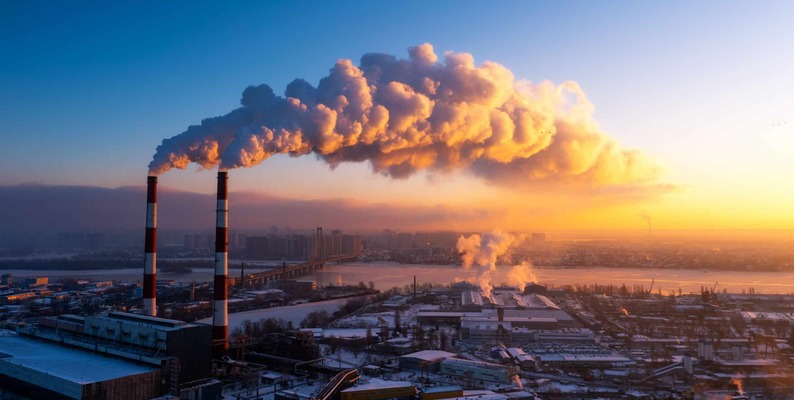

The dataset contains 36733 instances of 11 sensor measures aggregated over one hour, from a gas turbine located in Turkey for the purpose of studying flue gas emissions, namely CO and NOx.

The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine located in Turkey's north western region for the purpose of studying flue gas emissions, namely CO and NOx (NO + NO2). The data comes from the same power plant and used for predicting hourly net energy yield.Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables. The dataset can be well used for predicting turbine energy yield (TEY) using ambient variables as features.


* Ambient temperature (AT) C
* Ambient pressure (AP) mbar
* Ambient humidity (AH) (%)
* Air filter difference pressure (AFDP) mbar
* Gas turbine exhaust pressure (GTEP) mbar
* Turbine inlet temperature (TIT) C
* Turbine after temperature (TAT) C
* Compressor discharge pressure (CDP) mbar
* Turbine energy yield (TEY) MWH
* Carbon monoxide (CO) mg/m3
* Nitrogen oxides (NOx) mg/m3

# Importing Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import classification_report,accuracy_score

# Loading the Datasets

In [ ]:
df1=pd.read_csv("/content/gt_2011.csv")
df2=pd.read_csv("/content/gt_2012.csv")
df3=pd.read_csv("/content/gt_2013.csv")
df4=pd.read_csv("/content/gt_2014.csv")
df5=pd.read_csv("/content/gt_2015.csv")

In [ ]:
df=pd.concat([df1,df2,df3,df4,df5],axis=0,ignore_index=True)
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028
...,...,...,...,...,...,...,...,...,...,...,...
36728,3.6268,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,10.99300,89.172
36729,4.1674,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,11.14400,88.849
36730,5.4820,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,11.41400,96.147
36731,5.8837,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,3.31340,64.738


# Preprocessing

In [ ]:
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028


In [ ]:
df.tail()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
36728,3.6268,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,10.9930,89.172
36729,4.1674,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,11.1440,88.849
36730,5.4820,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,11.4140,96.147
36731,5.8837,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,3.3134,64.738
36732,6.0392,1028.8,94.547,3.8752,22.524,1067.9,548.23,125.41,11.462,11.9810,109.240


In [ ]:
df.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [ ]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000
mean,17.712726,1013.070165,77.867015,3.925518,25.563801,1081.428084,546.158517,133.506404,12.060525,2.372468,65.293067
std,7.447451,6.463346,14.461355,0.773936,4.195957,17.536373,6.842360,15.618634,1.088795,2.262672,11.678357
min,-6.234800,985.850000,24.085000,2.087400,17.698000,1000.800000,511.040000,100.020000,9.851800,0.000388,25.905000
25%,11.781000,1008.800000,68.188000,3.355600,23.129000,1071.800000,544.720000,124.450000,11.435000,1.182400,57.162000
50%,17.801000,1012.600000,80.470000,3.937700,25.104000,1085.900000,549.880000,133.730000,11.965000,1.713500,63.849000
75%,23.665000,1017.000000,89.376000,4.376900,29.061000,1097.000000,550.040000,144.080000,12.855000,2.842900,71.548000
max,37.103000,1036.600000,100.200000,7.610600,40.716000,1100.900000,550.610000,179.500000,15.159000,44.103000,119.910000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36733 entries, 0 to 36732
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      36733 non-null  float64
 1   AP      36733 non-null  float64
 2   AH      36733 non-null  float64
 3   AFDP    36733 non-null  float64
 4   GTEP    36733 non-null  float64
 5   TIT     36733 non-null  float64
 6   TAT     36733 non-null  float64
 7   TEY     36733 non-null  float64
 8   CDP     36733 non-null  float64
 9   CO      36733 non-null  float64
 10  NOX     36733 non-null  float64
dtypes: float64(11)
memory usage: 3.1 MB


In [ ]:
df.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

# Data Wrangling

(AT      0
 AP      0
 AH      0
 AFDP    0
 GTEP    0
 TIT     0
 TAT     0
 TEY     0
 CDP     0
 CO      0
 NOX     0
 dtype: int64,
 <Axes: >)

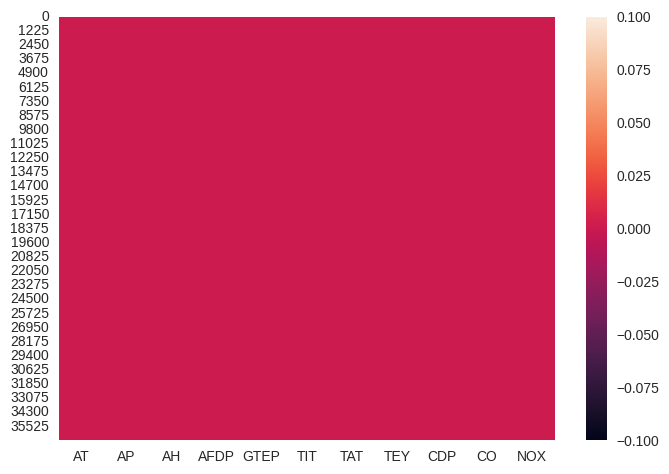

In [ ]:
df.isna().sum(),sns.heatmap(df.isna())

**Observation:** Dataset is free from null values

In [ ]:
df.duplicated().sum()

7

In [ ]:
df.drop_duplicates(inplace = True)

# Checking the distribution of attributes

**1.Histplot**

array([[<Axes: title={'center': 'AT'}>, <Axes: title={'center': 'AP'}>,
        <Axes: title={'center': 'AH'}>],
       [<Axes: title={'center': 'AFDP'}>,
        <Axes: title={'center': 'GTEP'}>,
        <Axes: title={'center': 'TIT'}>],
       [<Axes: title={'center': 'TAT'}>, <Axes: title={'center': 'TEY'}>,
        <Axes: title={'center': 'CDP'}>],
       [<Axes: title={'center': 'CO'}>, <Axes: title={'center': 'NOX'}>,
        <Axes: >]], dtype=object)

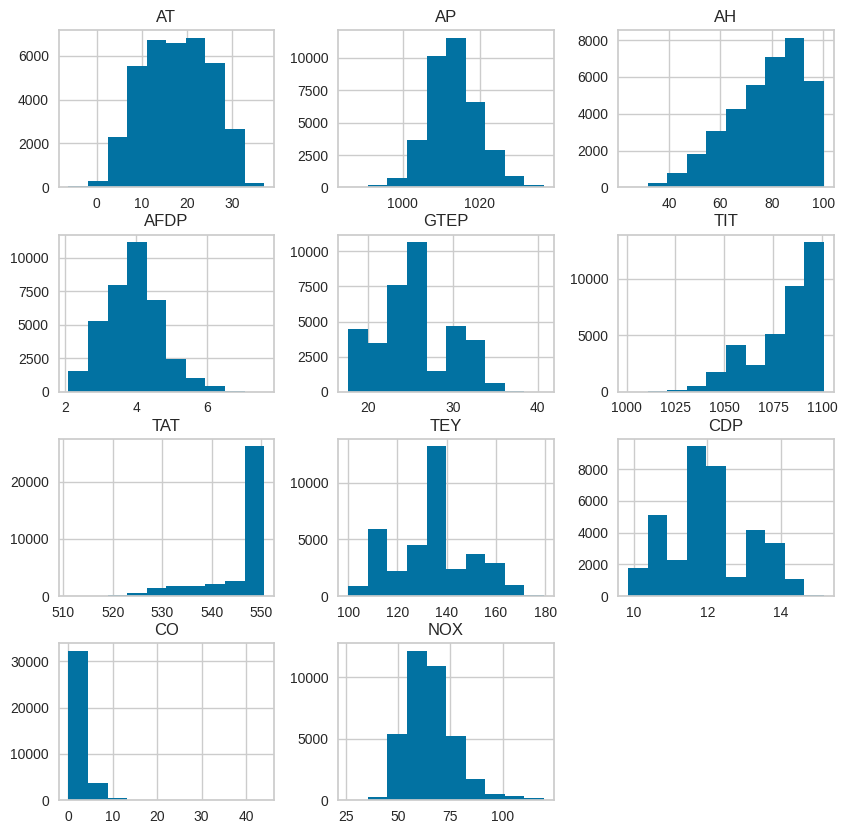

In [ ]:
df.hist(figsize = (10,10))

**2.Kde Plot**

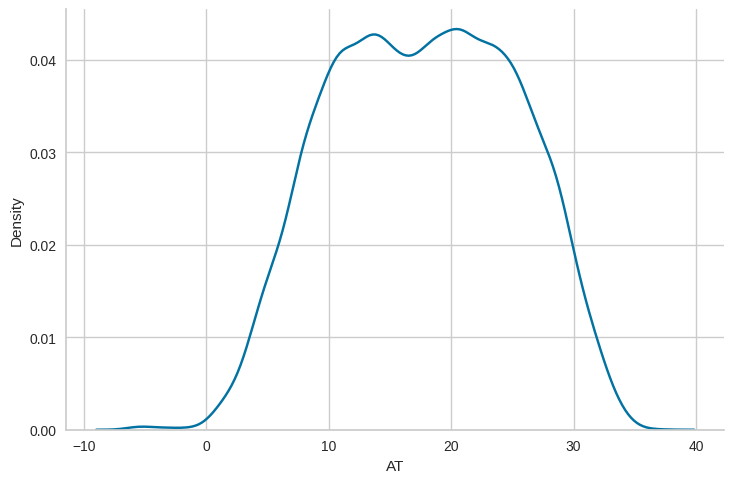

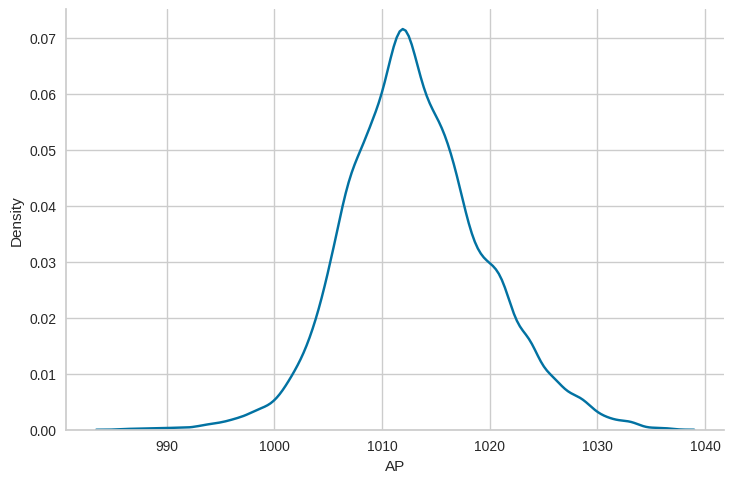

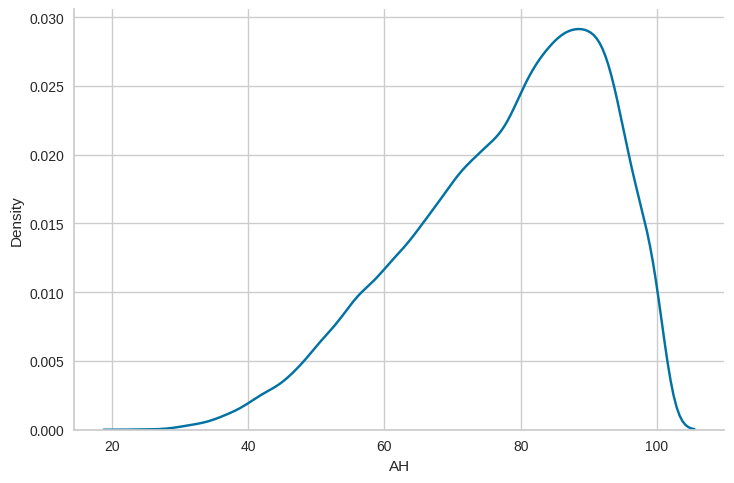

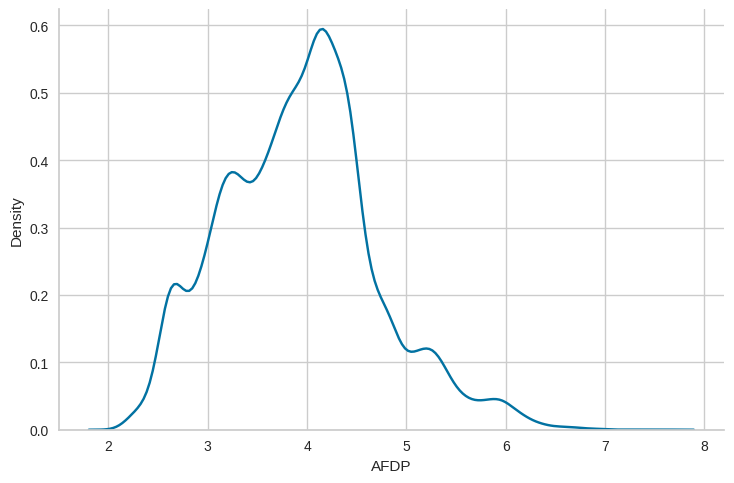

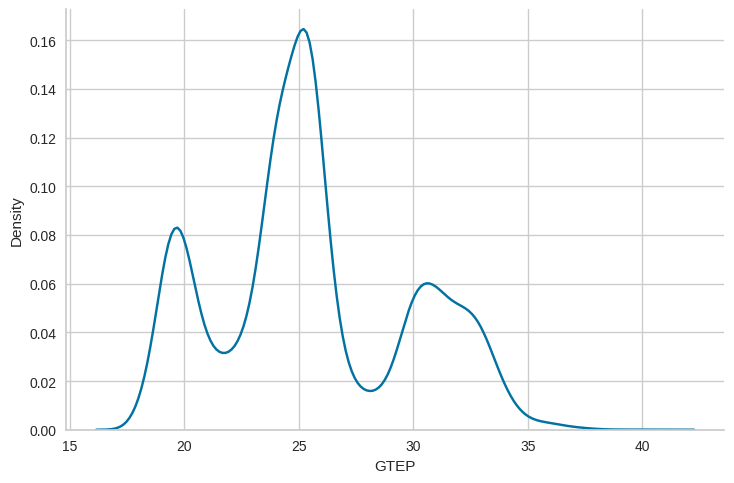

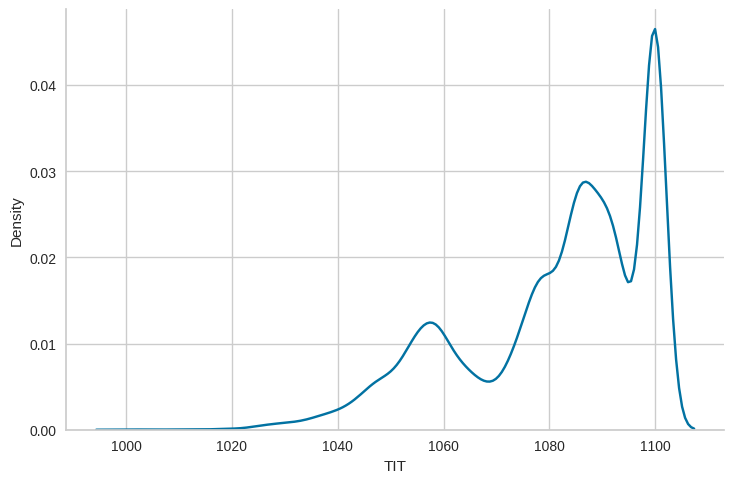

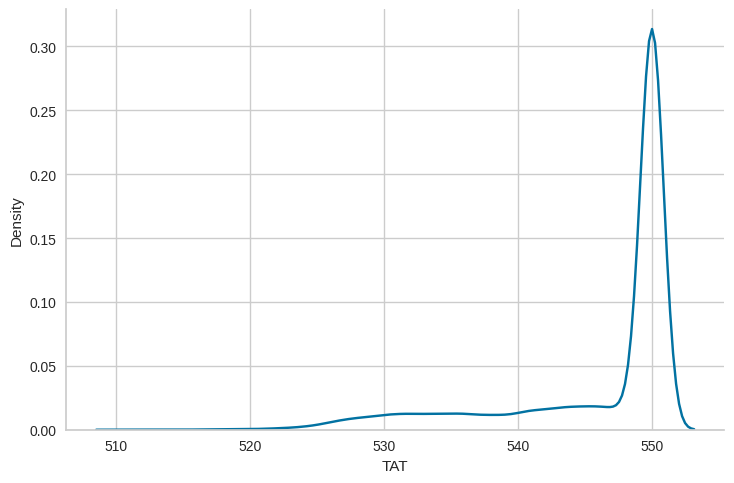

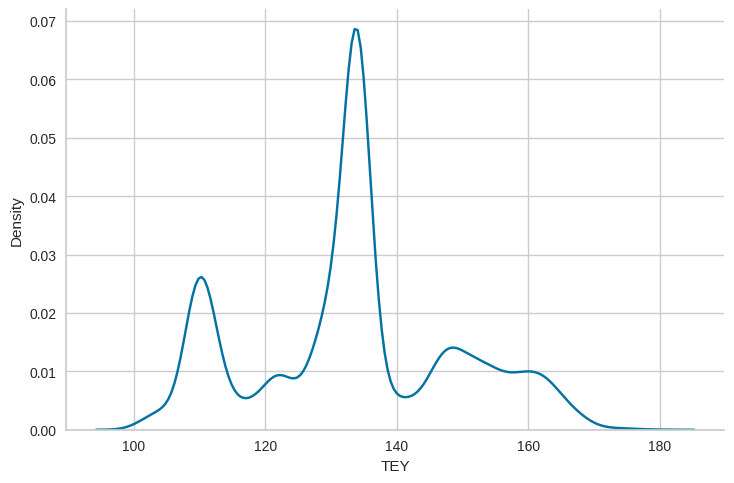

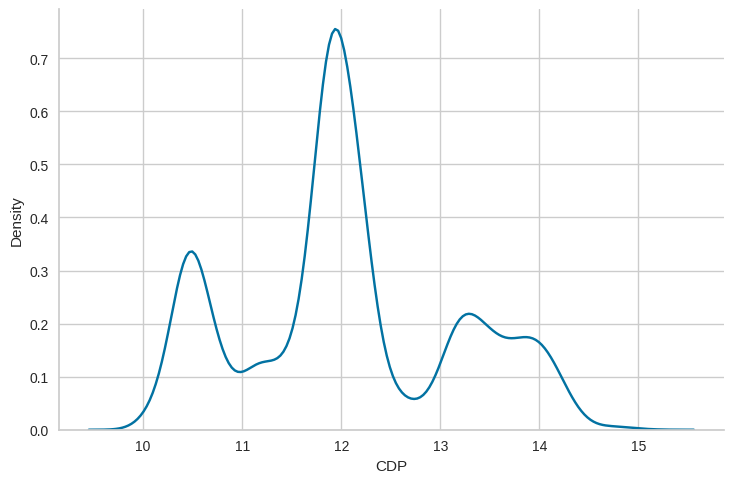

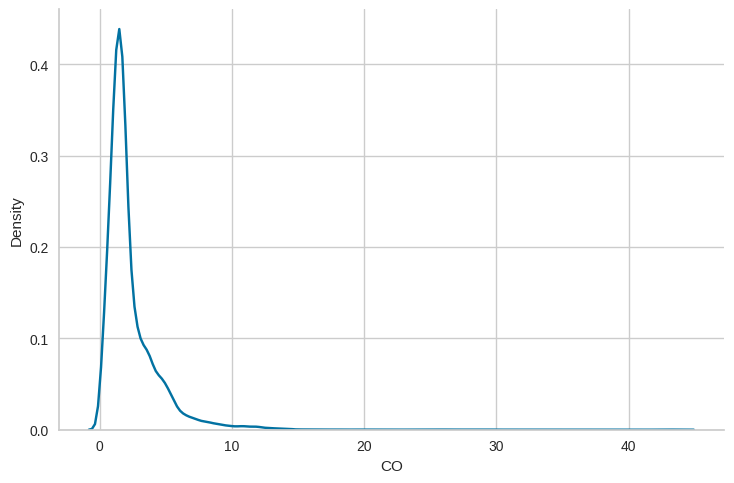

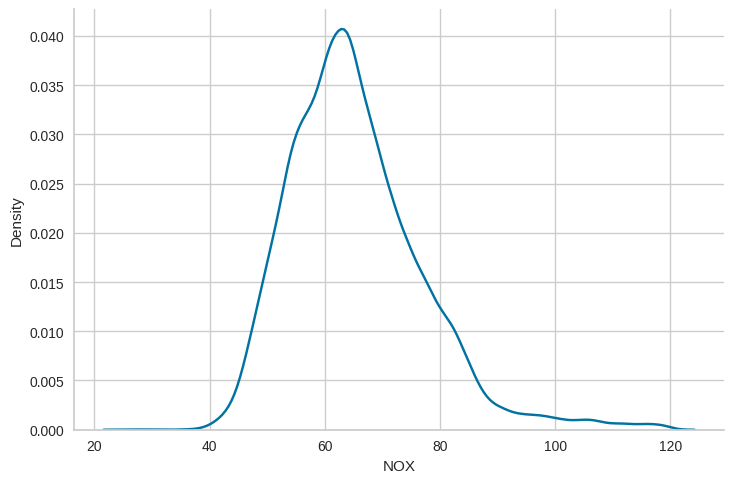

In [ ]:
for i in df.columns:
  g = sns.FacetGrid(df,height=5,aspect=1.5)
  g = g.map(sns.kdeplot, i)

**Observations:**
* AFDP and AP are uniformly distributed all other atttributes are skewed
* TIT,AH & TAT left skewed
* AFDP right skewed



# Clustering

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  data=KMeans(n_clusters=i,init="k-means++",random_state=42)
  data.fit(df)
  wcss.append(data.inertia_)

In [ ]:
print(wcss)

[39133855.44531399, 24676001.36920408, 19074751.485669754, 15154398.821779761, 13002319.27967726, 11775891.195790488, 10715294.783475827, 9829754.146084722, 9250935.269795189, 8779818.2426469]


In [ ]:
len(wcss)

10

Text(0, 0.5, 'Variance')

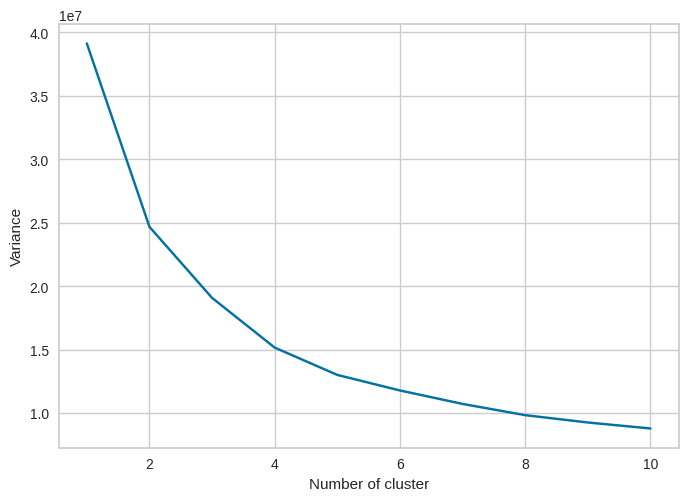

In [ ]:
lst=[i for i in range(1,11)]
plt.plot(lst,wcss)
plt.xlabel("Number of cluster")
plt.ylabel("Variance")

In [ ]:
!pip install yellowbrick

Elbow Method to determine the number of clusters to be formed:


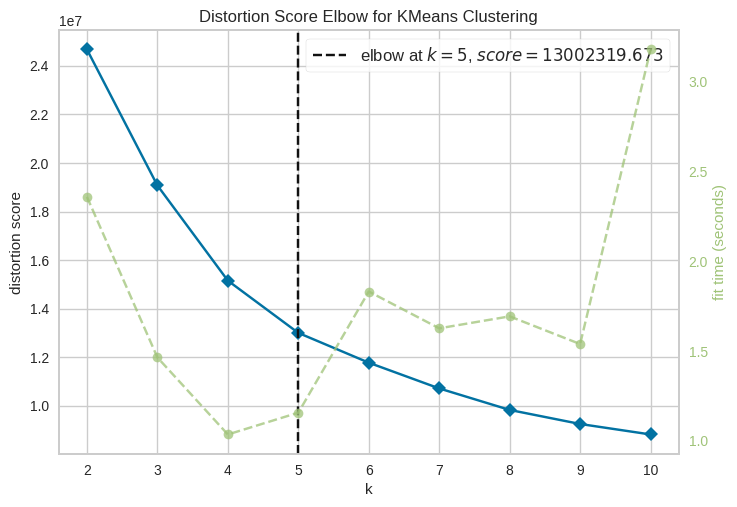

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df)
Elbow_M.show()

In [ ]:
data1=KMeans(n_clusters=5,init="k-means++",random_state=42)
y_data=data1.fit_predict(df)
y_data

array([2, 2, 2, ..., 1, 2, 1], dtype=int32)

In [ ]:
df['cluster']=y_data
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,cluster
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952,2
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377,2
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776,2
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505,2
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028,2
...,...,...,...,...,...,...,...,...,...,...,...,...
36728,3.6268,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,10.99300,89.172,1
36729,4.1674,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,11.14400,88.849,1
36730,5.4820,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,11.41400,96.147,1
36731,5.8837,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,3.31340,64.738,2


# Cluster Distribution

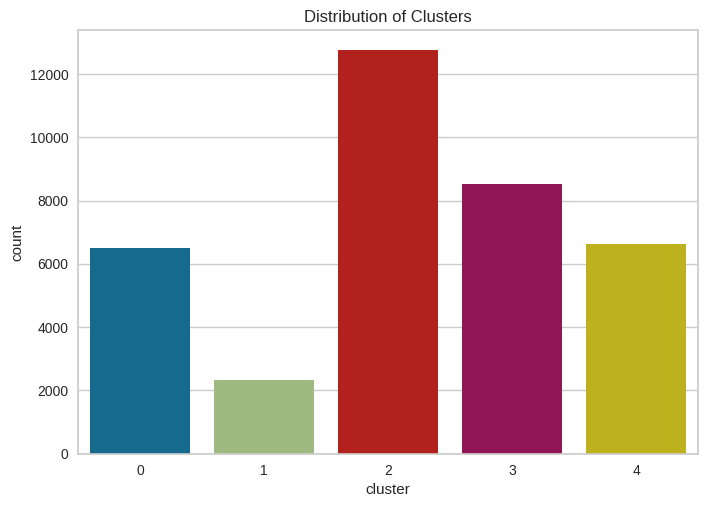

In [ ]:
sns.countplot(x=df["cluster"],data=df)
plt.title("Distribution of Clusters")
plt.show()


**Observations:**


**cluster2>cluster3>cluster4>cluster0>cluster1**

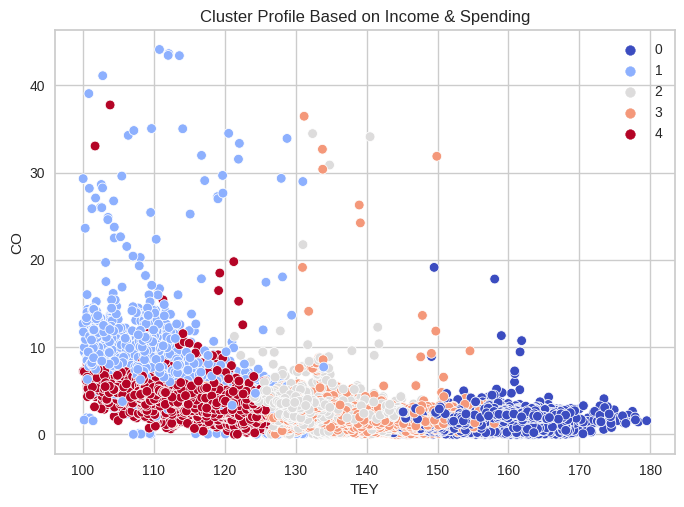

In [ ]:
sns.scatterplot(data=df, x='TEY',y='CO',hue='cluster',palette="coolwarm")
plt.title('Cluster Profile Based on Income & Spending')
plt.legend()
plt.show()


# Outlier Handling in each clusters

In [ ]:
c0 = df.loc[df["cluster"]==0]
c0

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,cluster
11,7.9896,1017.9,87.541,4.3905,30.128,1094.5,534.81,152.60,13.333,0.94292,73.286,0
12,9.8712,1017.2,84.249,4.6983,32.341,1100.2,530.58,159.99,13.929,1.04280,70.558,0
13,10.7220,1016.5,80.263,4.7526,32.739,1100.2,528.93,160.60,14.049,1.34840,71.115,0
14,11.0170,1016.3,78.128,4.7440,32.672,1100.1,529.06,160.40,14.018,1.06860,70.107,0
15,10.9460,1016.2,77.960,4.6919,32.424,1100.3,530.67,160.09,13.945,0.21538,67.415,0
...,...,...,...,...,...,...,...,...,...,...,...,...
36721,8.6922,1028.8,80.932,4.7576,33.229,1100.0,530.83,163.56,14.208,2.13730,47.668,0
36722,7.2153,1028.9,82.391,4.7794,33.288,1100.0,530.54,164.09,14.245,2.08290,47.688,0
36723,5.7884,1029.2,85.360,4.8570,33.644,1100.0,529.19,165.41,14.322,1.79550,47.228,0
36724,4.3528,1029.2,87.147,4.9960,34.094,1100.0,527.73,167.04,14.378,1.76180,47.370,0


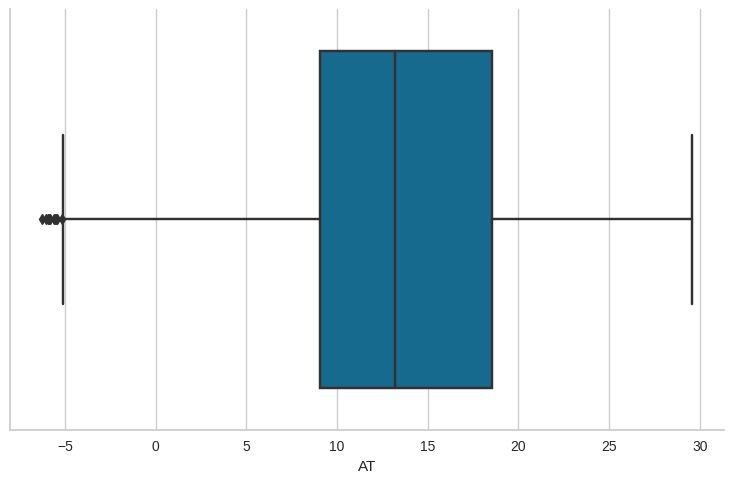

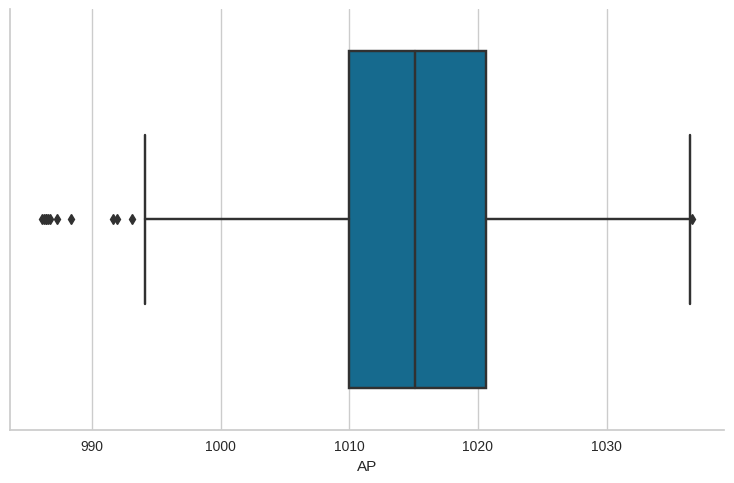

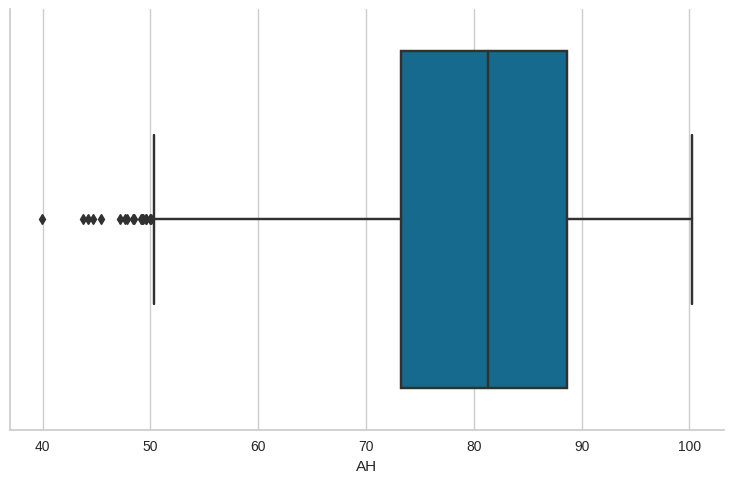

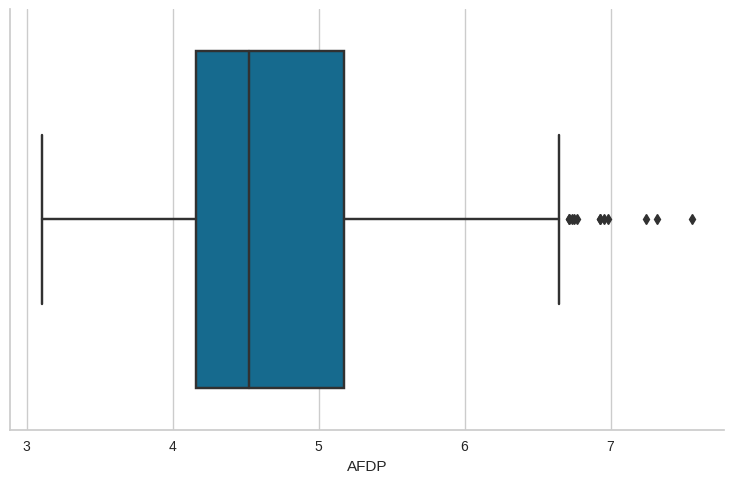

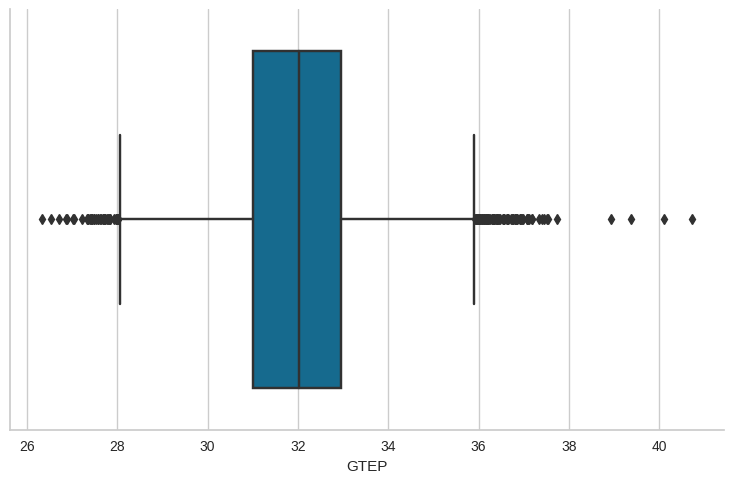

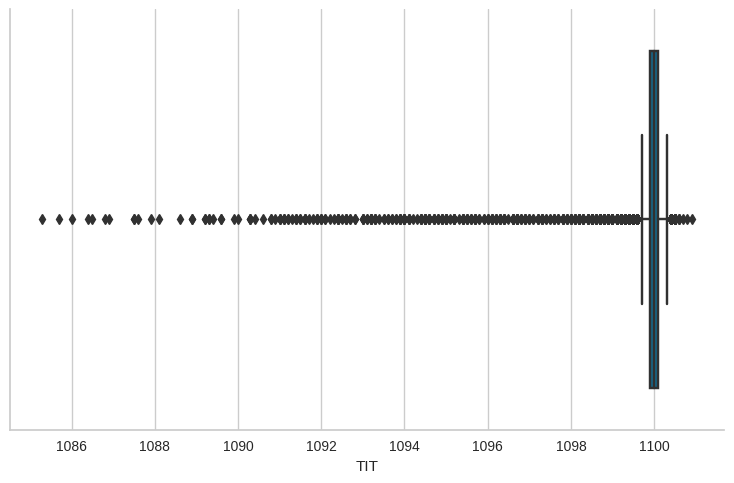

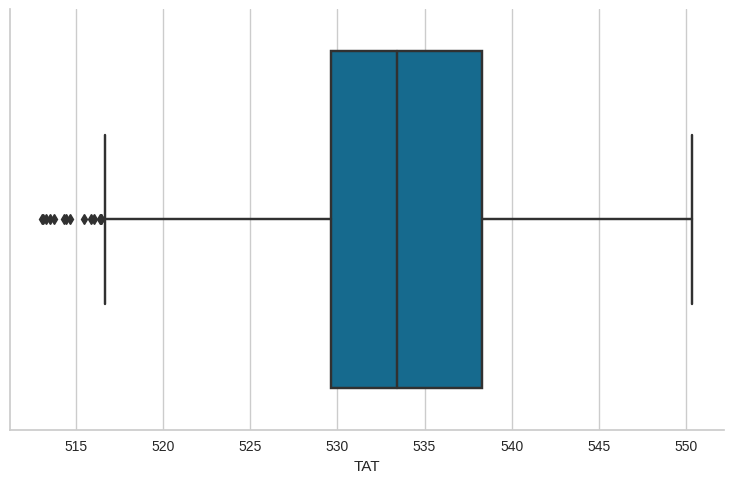

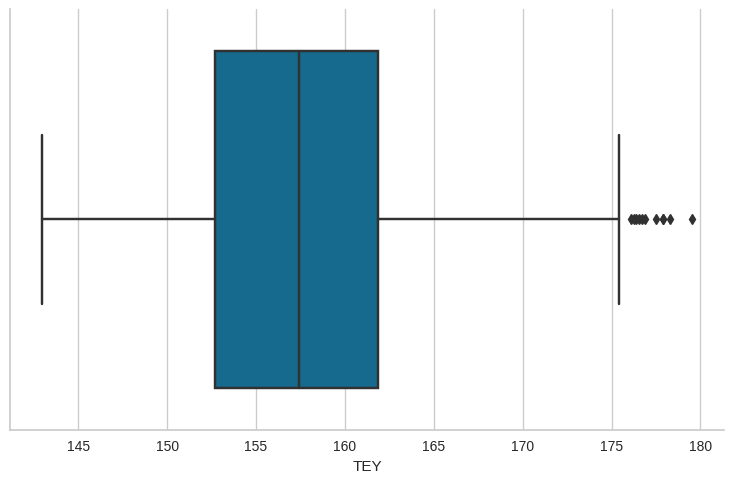

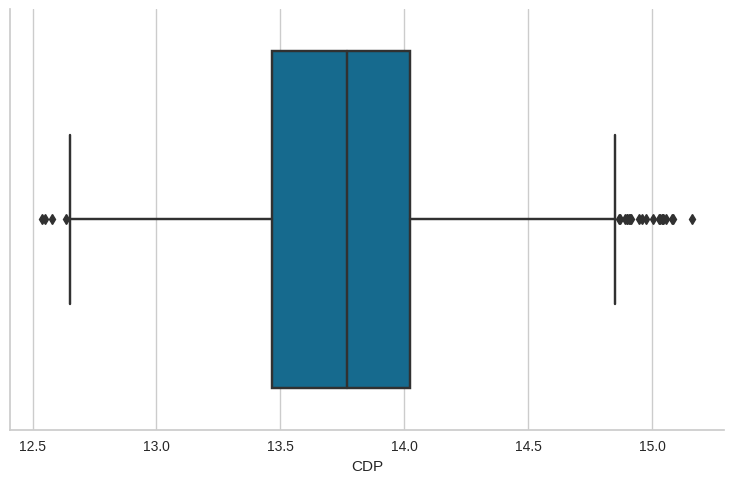

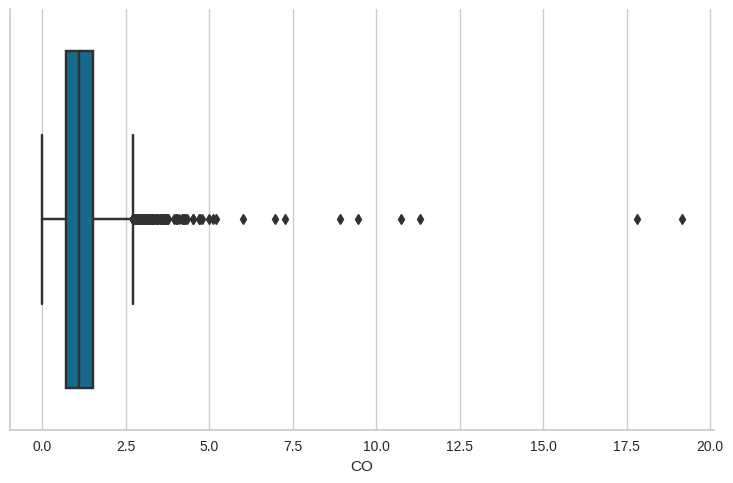

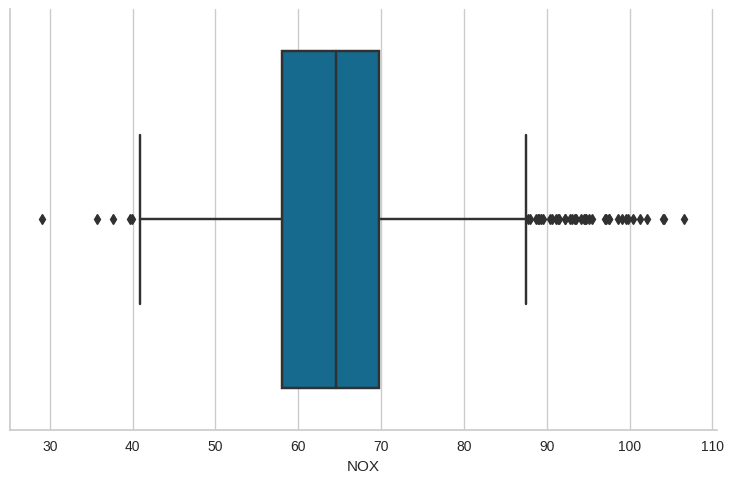

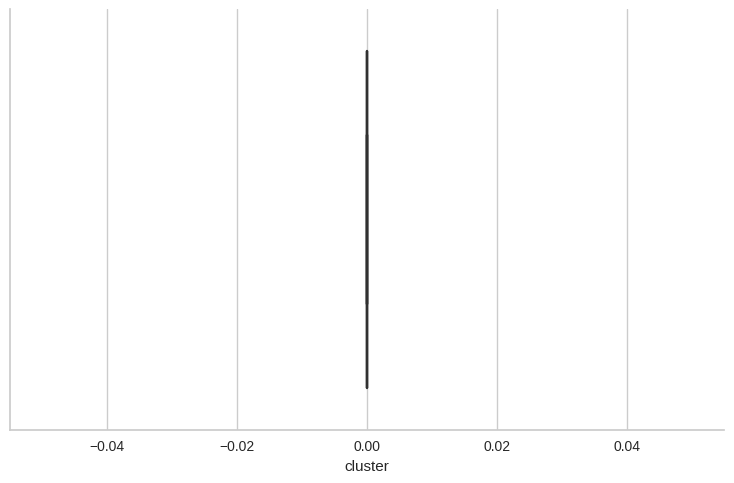

In [ ]:
for i in c0.columns:
  g = sns.FacetGrid(c0,height=5,aspect=1.5)
  g = g.map(sns.boxplot, i)

In [ ]:
from scipy import stats
z_scores = stats.zscore(c0)
abs_z_scores = np.abs(z_scores)
outlier_indices0 = (abs_z_scores > 3).any(axis=1) #threshold=3

In [ ]:
c0_cleaned = c0[~outlier_indices0]
c0_cleaned.shape

(6164, 12)

In [ ]:
print(len(c0)-len(c0_cleaned))

333


Eliminated 333 Outliers

In [ ]:
c1 = df.loc[df["cluster"]==1]
c1

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,cluster
905,10.6300,1010.3,82.685,3.3995,18.778,1053.9,550.03,110.86,10.268,3.8593,86.072,1
927,8.8774,1015.3,78.083,3.3170,19.103,1047.5,544.16,111.58,10.337,4.2338,98.894,1
928,7.3684,1016.5,80.090,3.4476,19.166,1057.7,550.13,111.73,10.530,3.0735,99.470,1
929,8.0533,1016.9,81.311,3.5359,19.577,1059.6,550.22,112.62,10.743,2.1595,85.407,1
1620,8.0236,1025.6,85.816,3.7967,20.521,1067.5,550.12,121.11,10.958,2.7495,82.161,1
...,...,...,...,...,...,...,...,...,...,...,...,...
36713,8.5224,1029.9,88.374,2.9068,18.882,1037.7,543.23,108.10,10.423,6.2772,76.011,1
36728,3.6268,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,10.9930,89.172,1
36729,4.1674,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,11.1440,88.849,1
36730,5.4820,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,11.4140,96.147,1


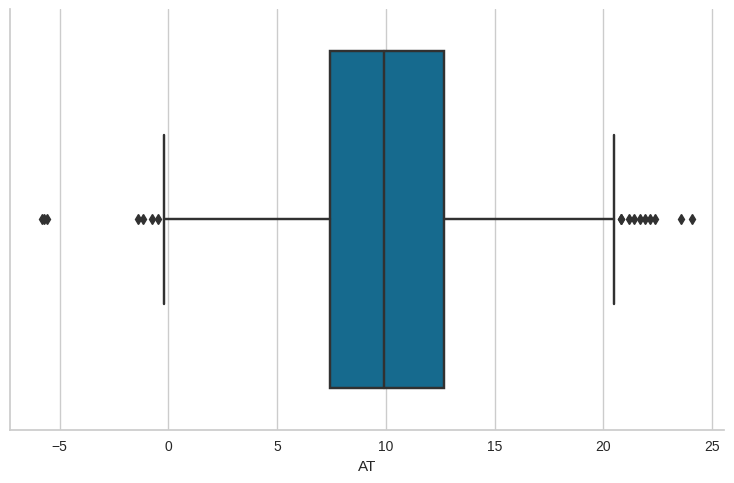

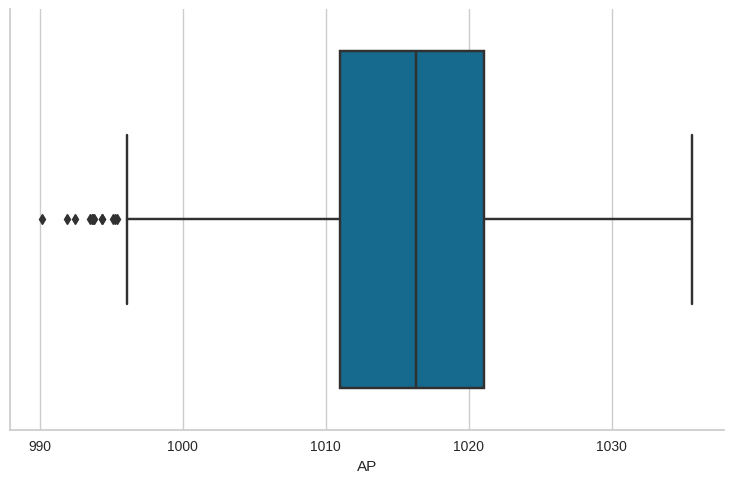

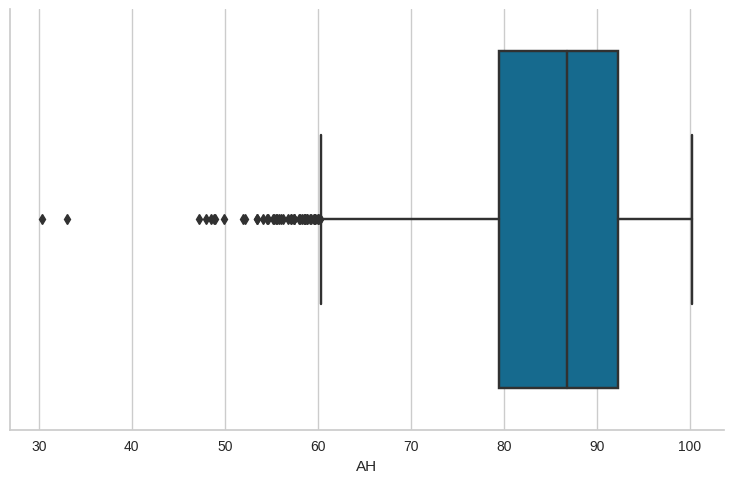

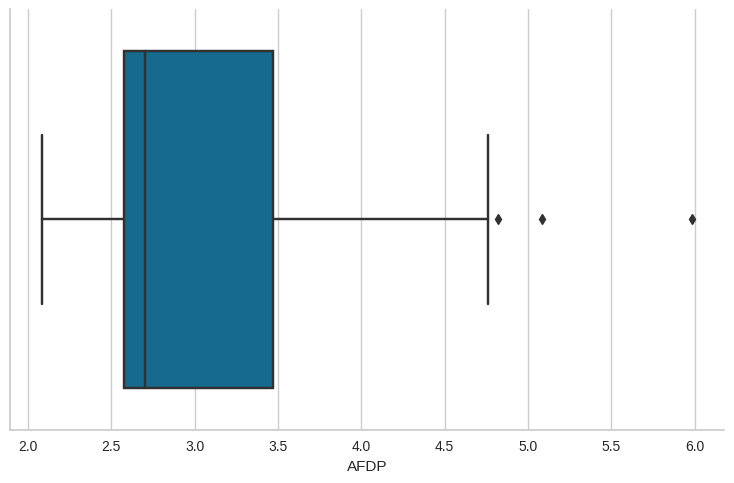

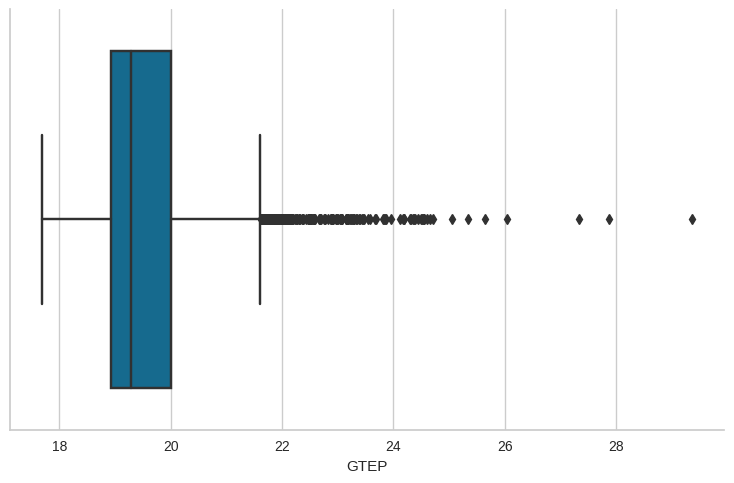

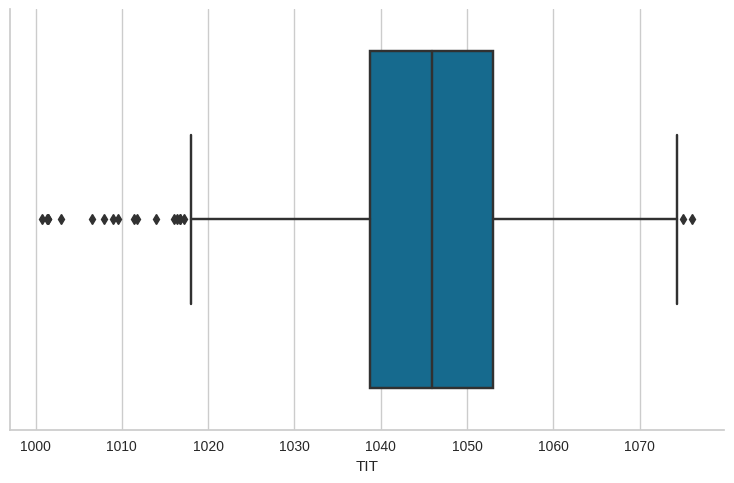

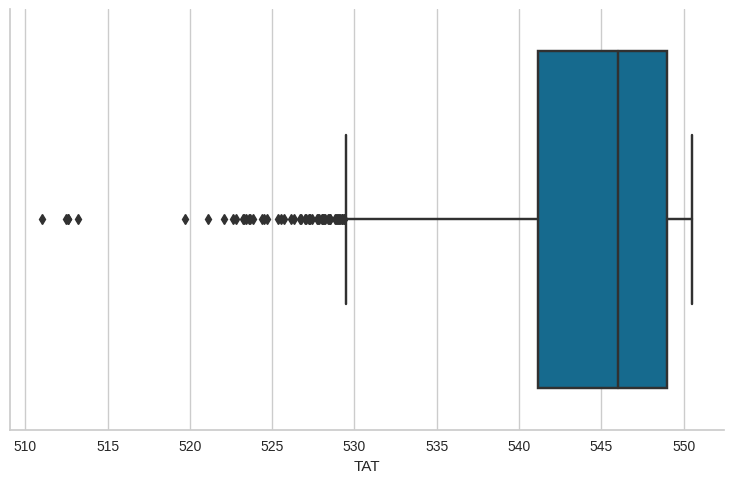

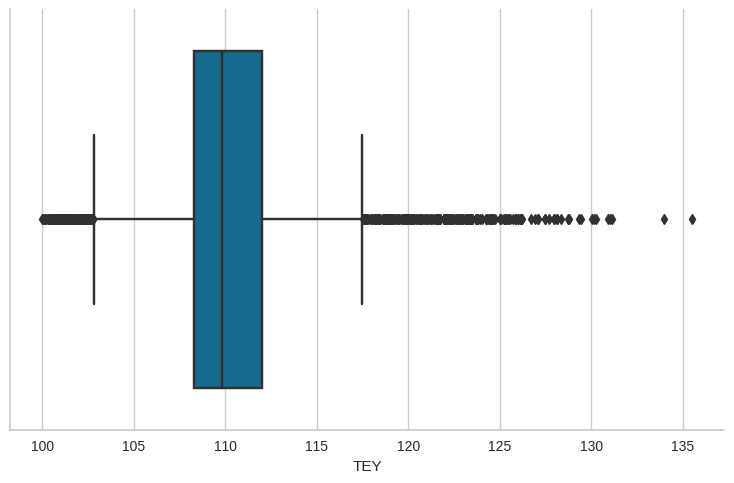

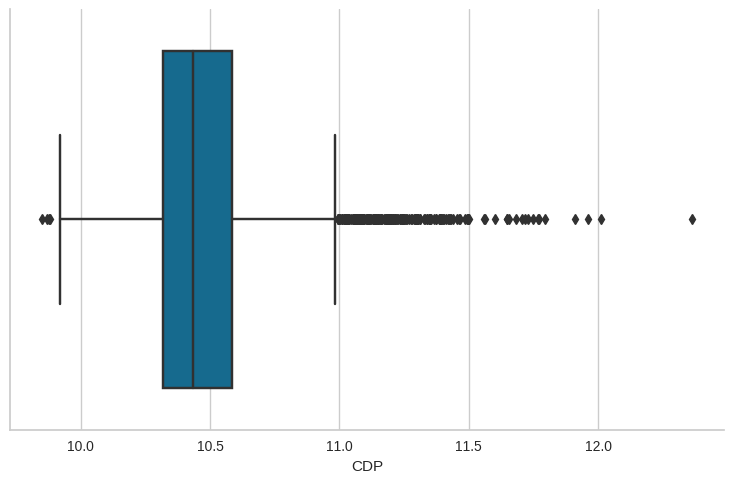

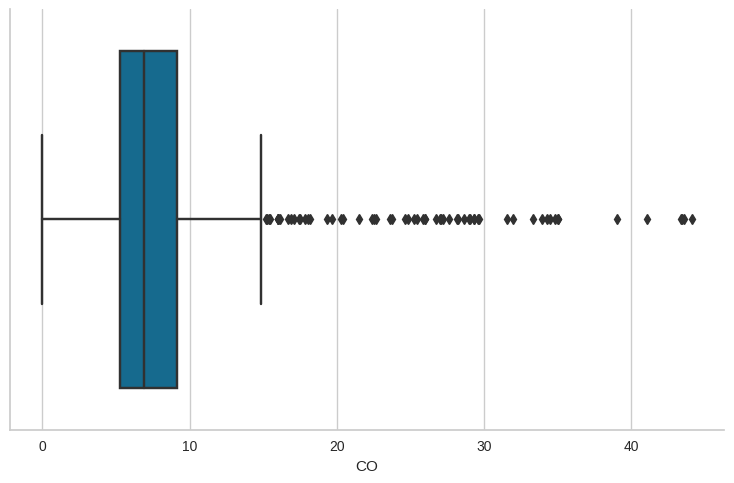

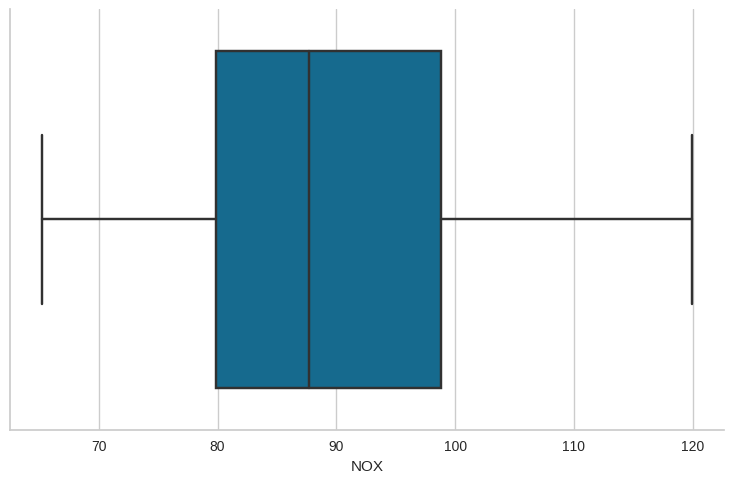

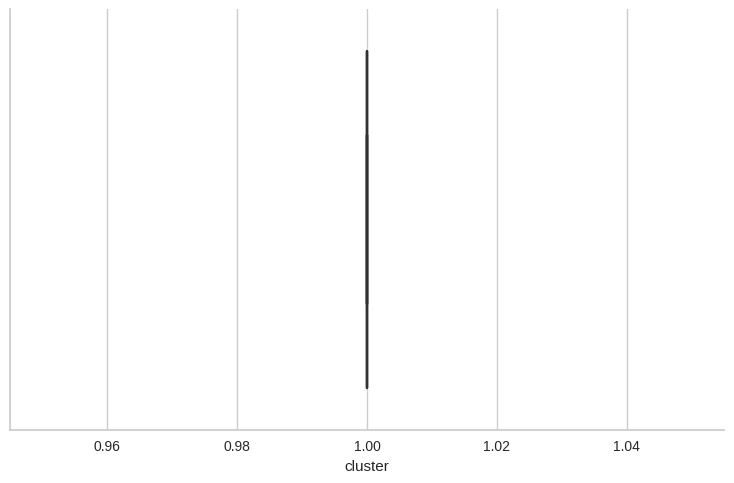

In [ ]:
for i in c1.columns:
  g = sns.FacetGrid(c1,height=5,aspect=1.5)
  g = g.map(sns.boxplot,i)

In [ ]:
from scipy import stats
z_scores = stats.zscore(c1)
abs_z_scores = np.abs(z_scores)
outlier_indices1 = (abs_z_scores > 3).any(axis=1)

In [ ]:
c1_cleaned = c1[~outlier_indices1]
c1_cleaned

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,cluster
905,10.6300,1010.3,82.685,3.3995,18.778,1053.9,550.03,110.86,10.268,3.8593,86.072,1
927,8.8774,1015.3,78.083,3.3170,19.103,1047.5,544.16,111.58,10.337,4.2338,98.894,1
928,7.3684,1016.5,80.090,3.4476,19.166,1057.7,550.13,111.73,10.530,3.0735,99.470,1
929,8.0533,1016.9,81.311,3.5359,19.577,1059.6,550.22,112.62,10.743,2.1595,85.407,1
1620,8.0236,1025.6,85.816,3.7967,20.521,1067.5,550.12,121.11,10.958,2.7495,82.161,1
...,...,...,...,...,...,...,...,...,...,...,...,...
36669,11.3290,1029.5,78.334,2.8485,18.571,1016.7,530.68,100.64,10.179,6.3127,95.850,1
36713,8.5224,1029.9,88.374,2.9068,18.882,1037.7,543.23,108.10,10.423,6.2772,76.011,1
36728,3.6268,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,10.9930,89.172,1
36729,4.1674,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,11.1440,88.849,1


In [ ]:
print(len(c1)-len(c1_cleaned))

118


Eliminated 118 outliers

In [ ]:
c2 =  df.loc[df["cluster"]==2]
c2

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,cluster
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952,2
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377,2
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776,2
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505,2
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028,2
...,...,...,...,...,...,...,...,...,...,...,...,...
36707,2.8040,1028.5,85.691,3.3807,22.541,1072.4,549.83,127.91,11.552,3.54290,68.581,2
36708,2.4584,1028.6,85.003,3.3503,22.643,1073.1,549.81,128.65,11.505,3.64270,68.059,2
36709,2.6604,1028.7,85.115,3.8577,26.630,1085.2,543.74,143.26,12.583,3.45260,62.330,2
36726,3.4218,1028.7,91.003,3.6911,22.859,1073.5,549.78,129.86,11.549,3.67380,67.737,2


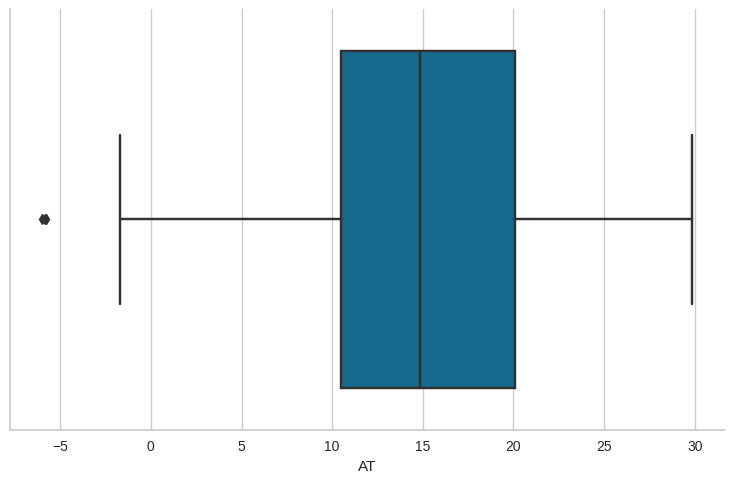

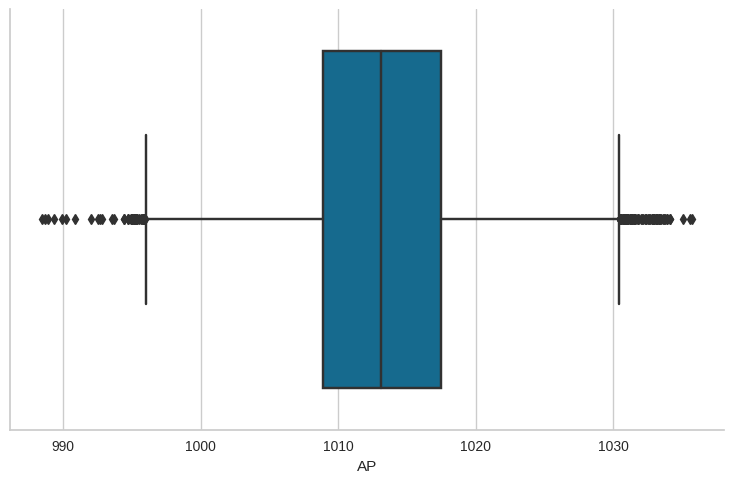

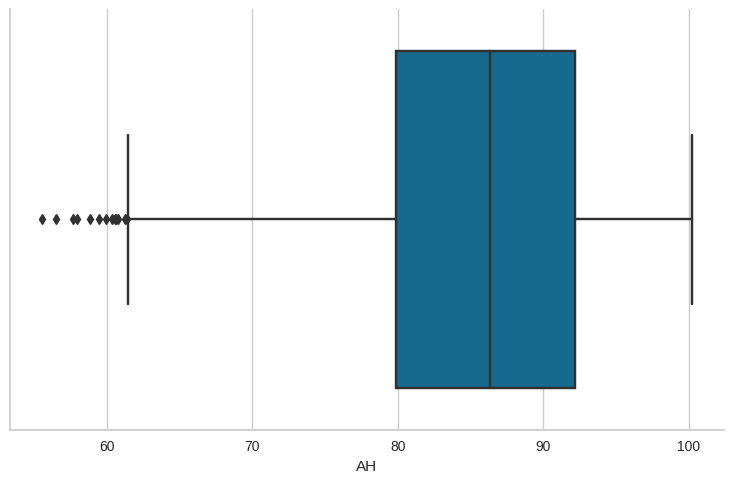

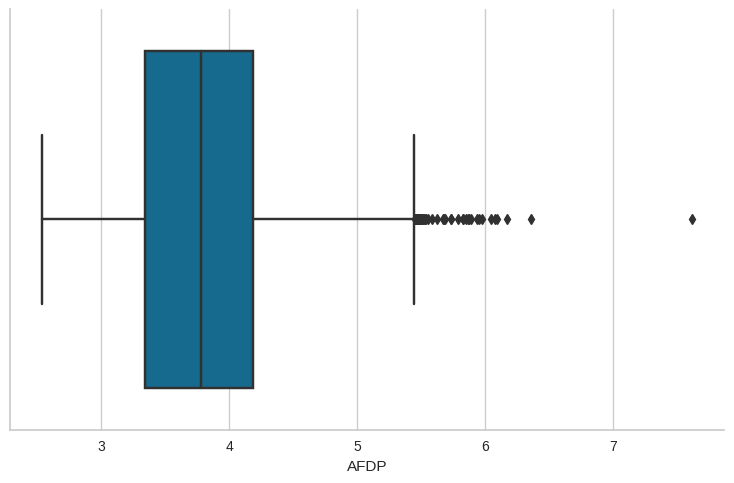

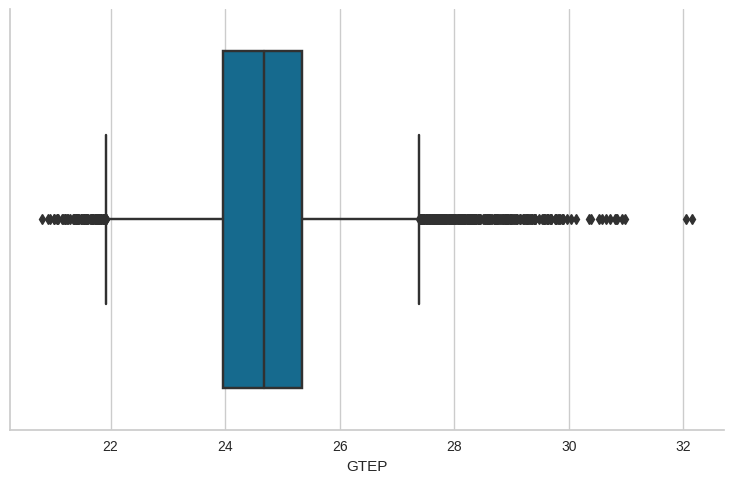

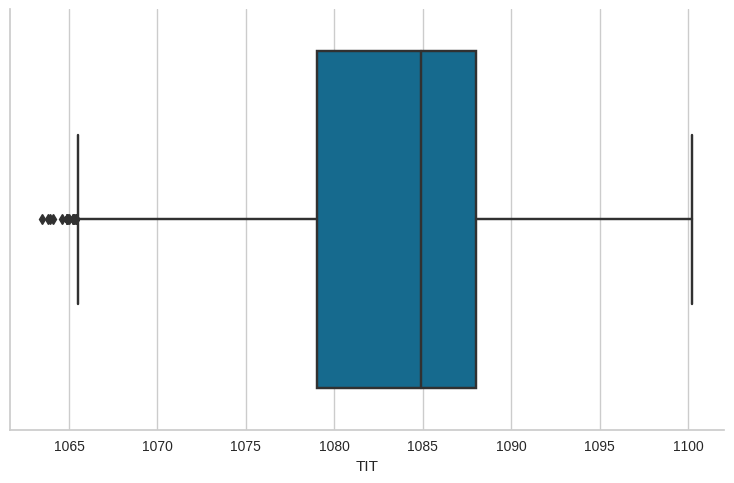

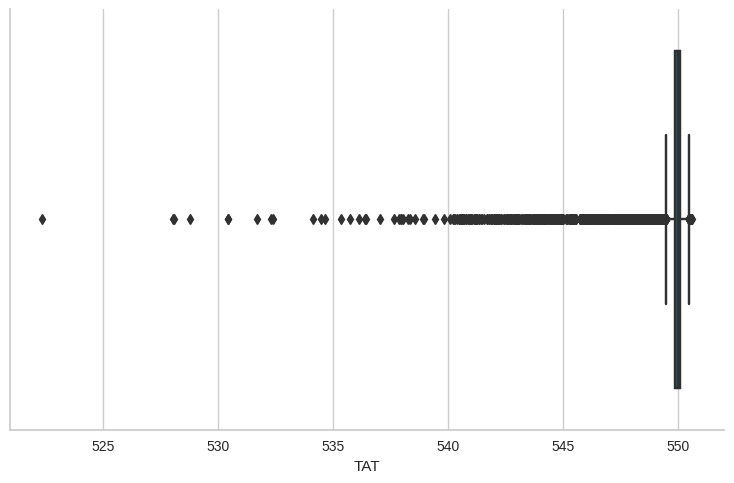

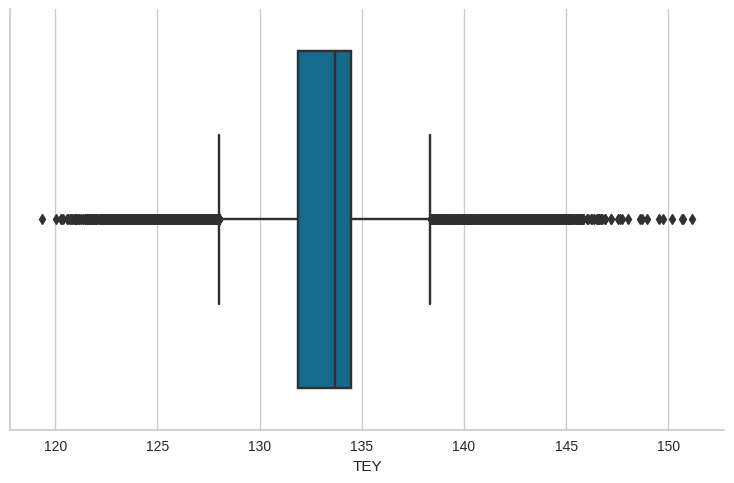

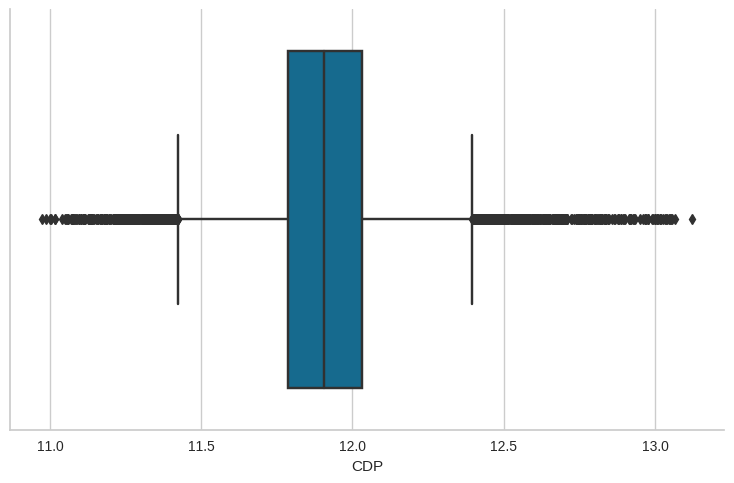

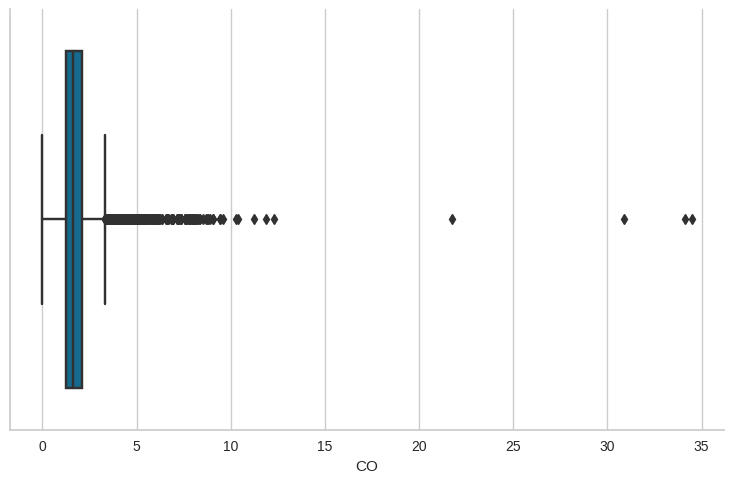

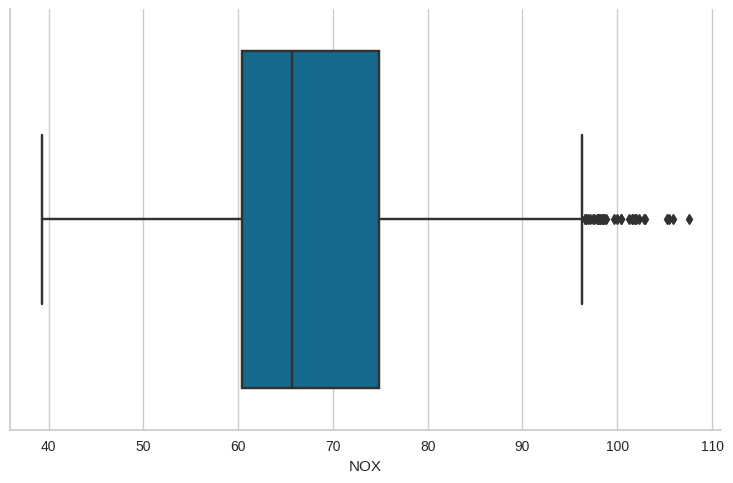

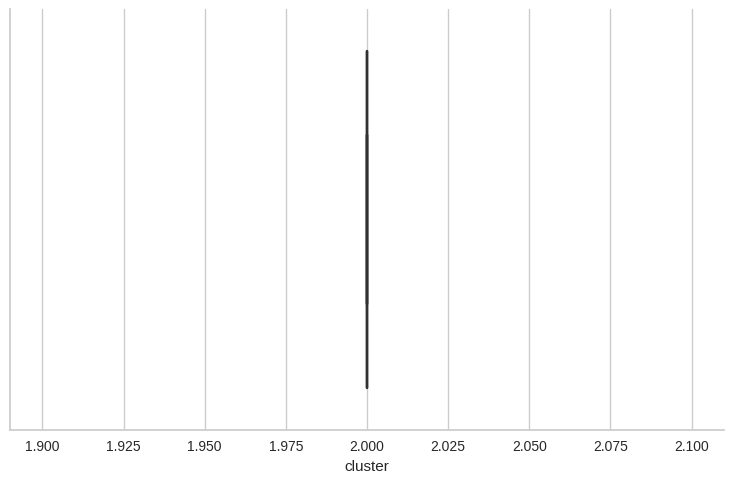

In [ ]:
for i in c2.columns:
  g = sns.FacetGrid(c2,height=5,aspect=1.5)
  g = g.map(sns.boxplot,i)

In [ ]:
from scipy import stats
z_scores = stats.zscore(c2)
abs_z_scores = np.abs(z_scores)
outlier_indices2 = (abs_z_scores > 3).any(axis=1)

In [ ]:
c2_cleaned = c2[~outlier_indices2]
c2_cleaned

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,cluster
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952,2
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377,2
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776,2
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505,2
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028,2
...,...,...,...,...,...,...,...,...,...,...,...,...
36706,2.7404,1028.5,87.596,3.4454,22.665,1072.8,549.79,128.21,11.635,3.53500,68.365,2
36707,2.8040,1028.5,85.691,3.3807,22.541,1072.4,549.83,127.91,11.552,3.54290,68.581,2
36708,2.4584,1028.6,85.003,3.3503,22.643,1073.1,549.81,128.65,11.505,3.64270,68.059,2
36726,3.4218,1028.7,91.003,3.6911,22.859,1073.5,549.78,129.86,11.549,3.67380,67.737,2


In [ ]:
print(len(c2)-len(c2_cleaned))

822


Eliminated 822 outliers

In [ ]:
c3 = df.loc[df["cluster"]==3]
c3

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,cluster
854,12.447,1015.3,61.760,4.0007,24.099,1085.7,549.98,134.01,11.758,0.82300,75.190,3
933,11.702,1016.3,62.237,4.4126,25.035,1090.9,550.07,133.68,12.141,1.32250,81.835,3
934,12.510,1015.7,56.475,4.3903,25.103,1091.5,550.03,133.67,12.147,1.31220,82.164,3
935,13.024,1015.3,51.462,4.4059,25.121,1091.5,549.89,133.68,12.096,1.38210,82.336,3
936,13.261,1015.1,54.803,4.4083,25.094,1091.0,549.59,133.67,12.031,0.93105,80.847,3
...,...,...,...,...,...,...,...,...,...,...,...,...
36607,10.697,1024.1,62.964,3.3872,23.364,1075.1,549.83,130.03,11.774,3.62320,62.107,3
36608,11.163,1023.5,61.663,3.6375,25.335,1080.3,546.27,136.26,12.201,3.38150,58.234,3
36630,11.607,1023.6,62.449,3.4167,23.581,1076.2,550.02,130.58,11.710,4.05630,60.785,3
36631,11.687,1023.5,61.672,3.3971,23.542,1076.0,549.90,130.38,11.775,3.54100,60.231,3


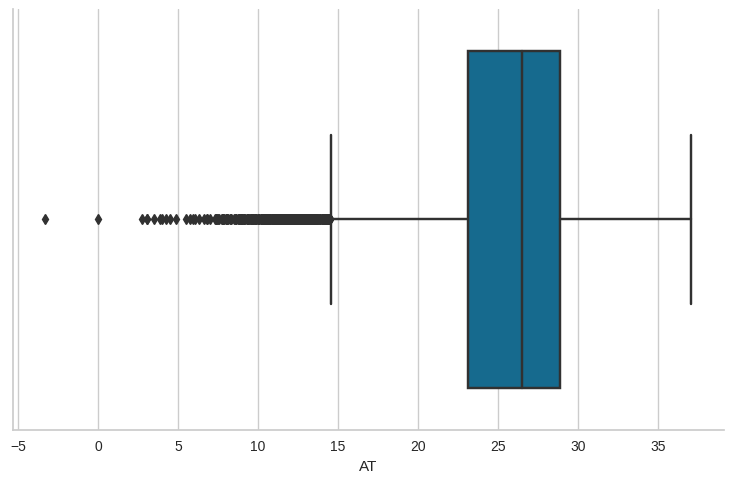

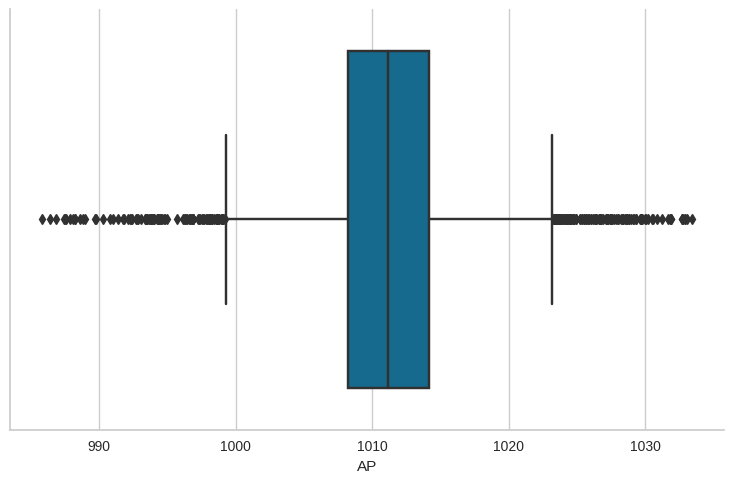

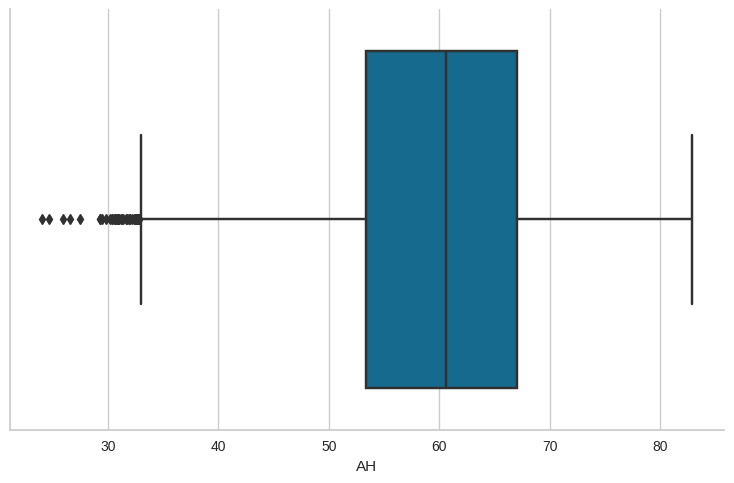

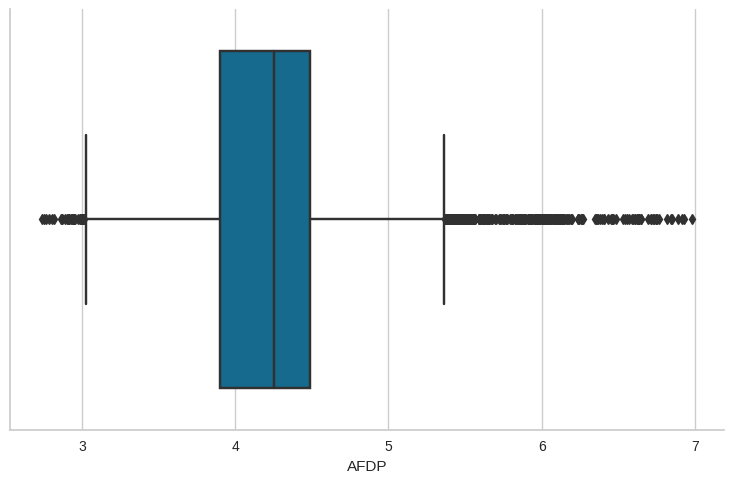

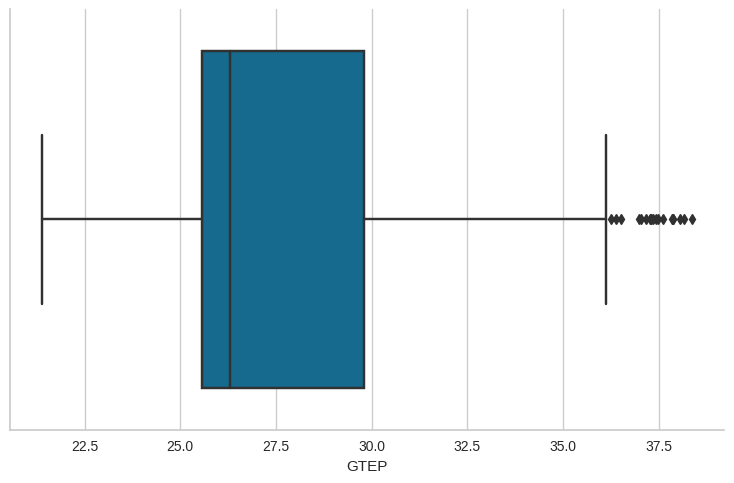

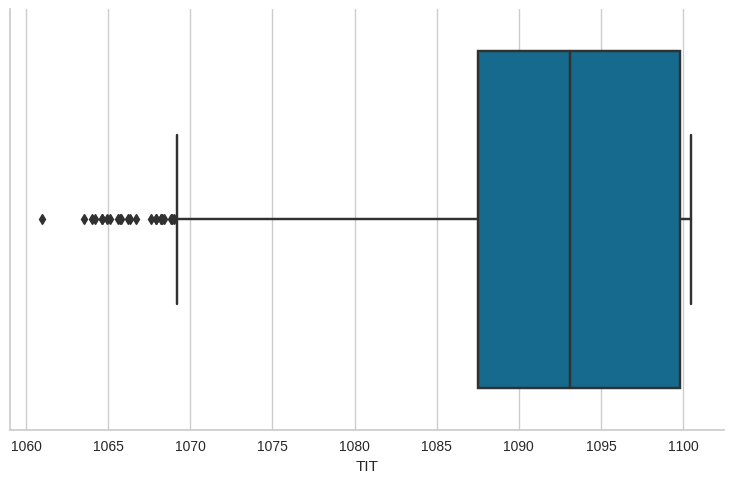

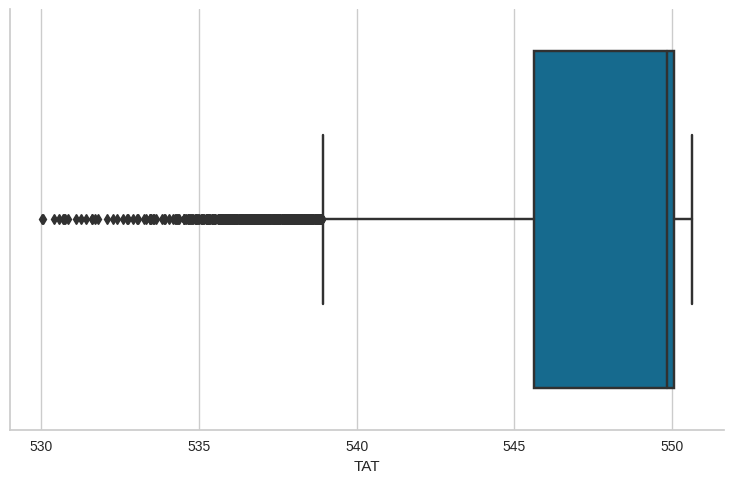

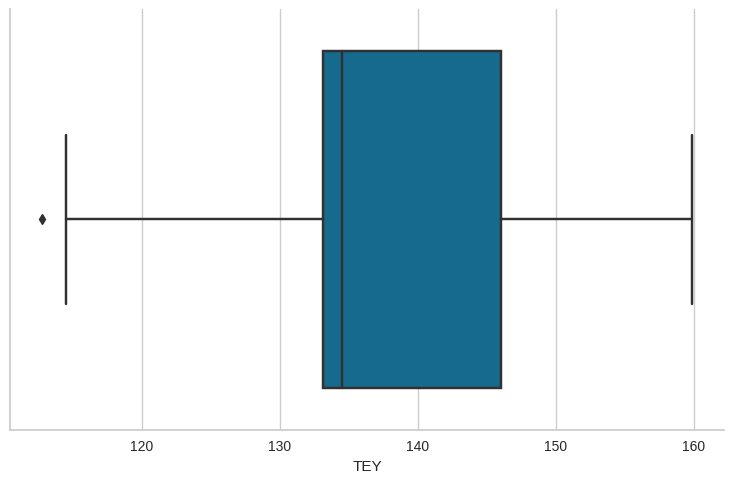

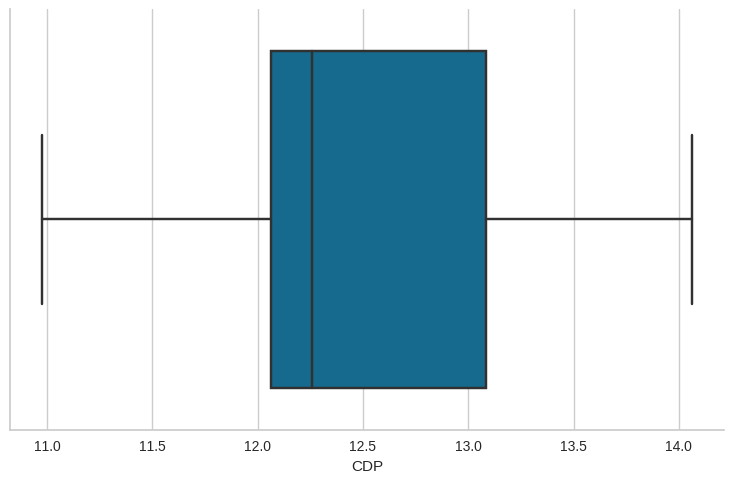

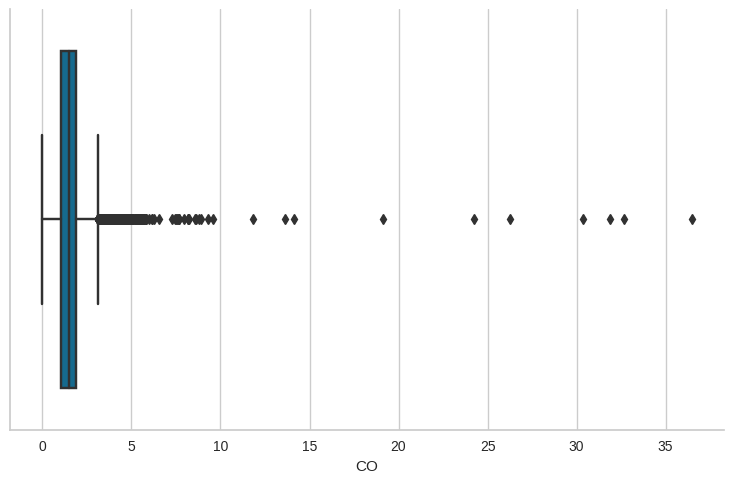

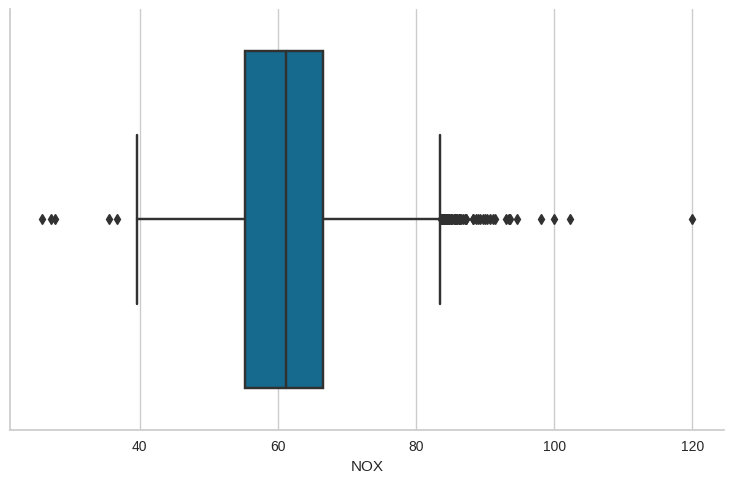

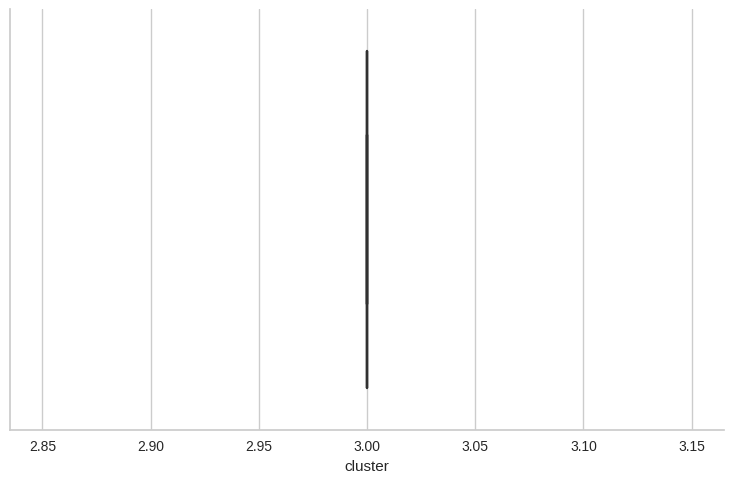

In [ ]:
for i in c3.columns:
  g = sns.FacetGrid(c3,height=5,aspect=1.5)
  g = g.map(sns.boxplot,i)

In [ ]:
from scipy import stats
z_scores = stats.zscore(c3)
abs_z_scores = np.abs(z_scores)
outlier_indices3 = (abs_z_scores > 3).any(axis=1)

In [ ]:
c3_cleaned = c3[~outlier_indices3]
c3_cleaned.shape


(7968, 12)

In [ ]:
print(len(c3)-len(c3_cleaned))

555


Eliminated 291 outliers from cluster3

In [ ]:
c4 = df.loc[df["cluster"]==4]
c4

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,cluster
1727,20.5970,1011.6,53.966,3.8820,19.747,1057.8,550.05,111.26,10.509,2.1192,69.203,4
1728,19.6820,1011.7,60.622,3.8408,19.746,1057.7,550.31,111.78,10.642,2.3353,69.408,4
1737,12.7980,1013.3,83.221,3.7353,19.772,1057.5,550.00,113.64,10.522,3.1741,76.343,4
1746,20.0980,1014.1,60.073,4.1294,21.348,1067.5,550.09,117.79,10.962,2.5211,72.597,4
1747,20.7940,1013.6,57.461,3.8575,19.743,1057.8,549.76,110.73,10.480,2.5008,70.948,4
...,...,...,...,...,...,...,...,...,...,...,...,...
36643,8.9439,1029.3,81.430,2.9071,19.706,1053.2,550.40,113.79,10.704,5.9466,66.600,4
36645,11.6840,1028.8,65.379,3.1284,21.280,1062.4,549.92,120.10,11.124,3.8244,63.816,4
36646,12.0780,1028.7,63.810,3.1421,21.537,1063.8,549.99,121.25,11.211,3.5333,63.861,4
36648,12.1240,1028.8,64.659,3.1631,21.727,1064.8,550.21,122.00,11.245,6.1245,66.281,4


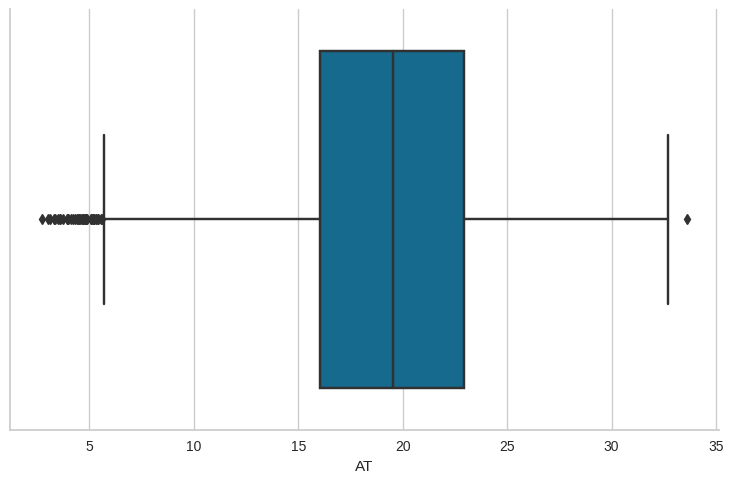

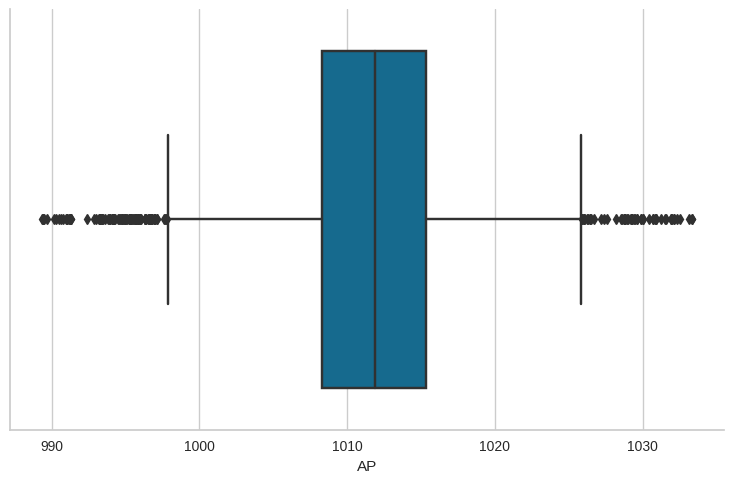

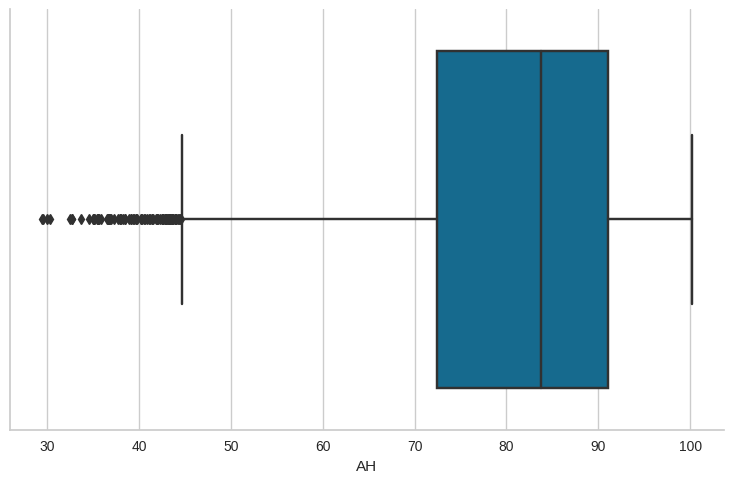

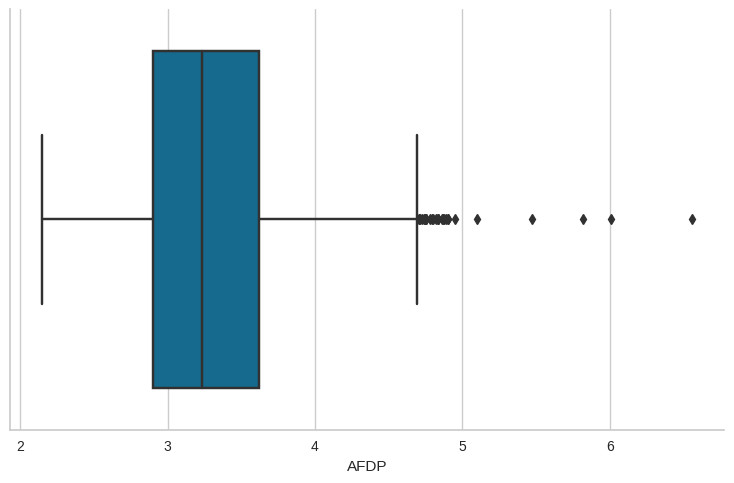

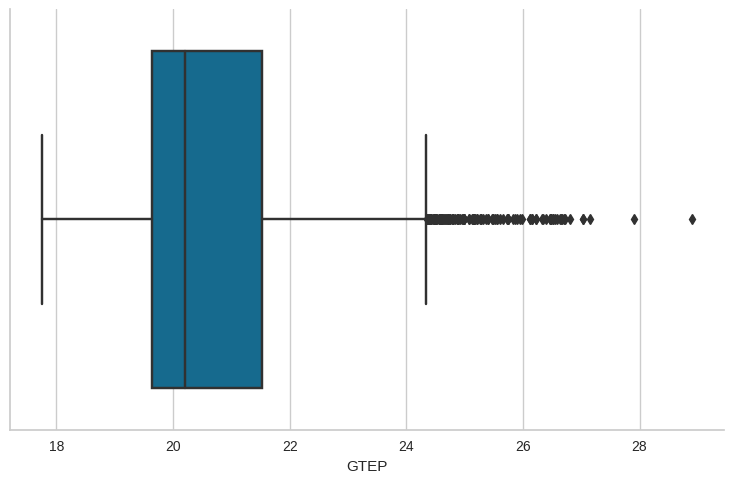

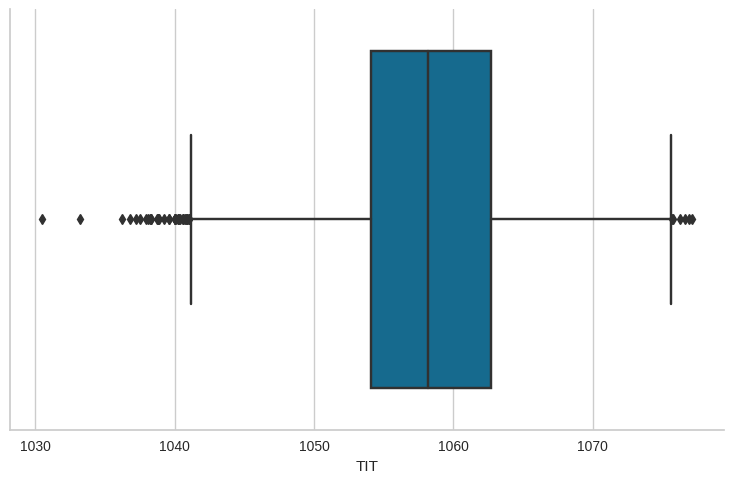

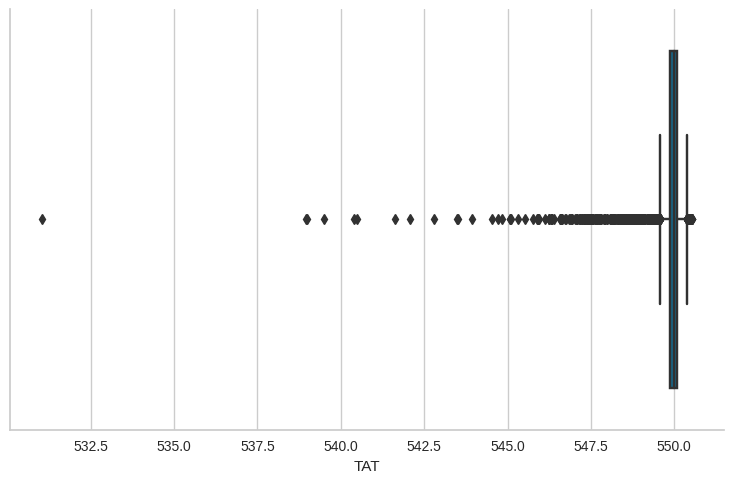

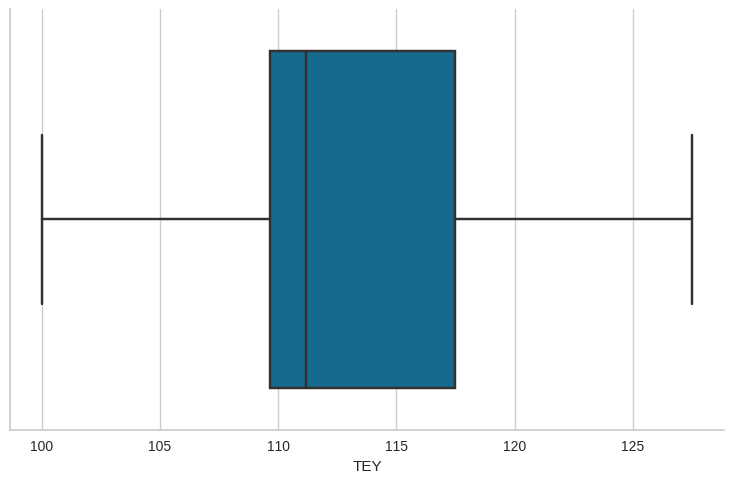

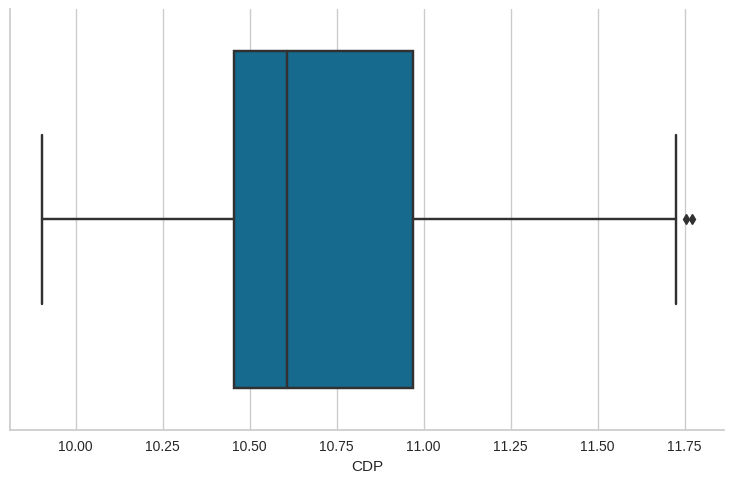

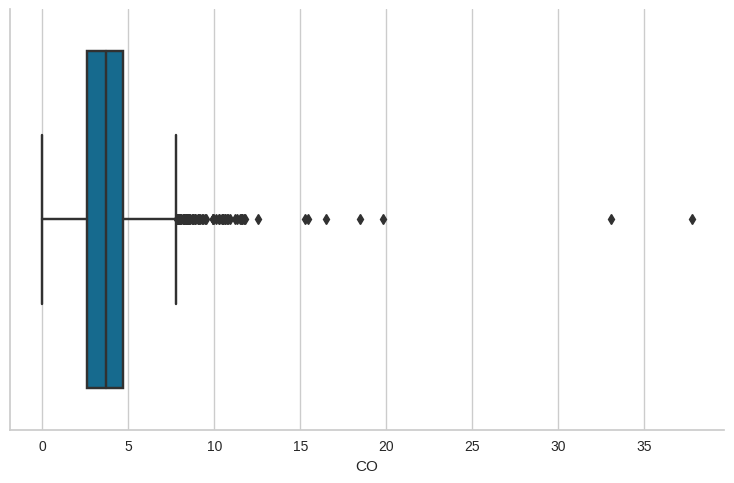

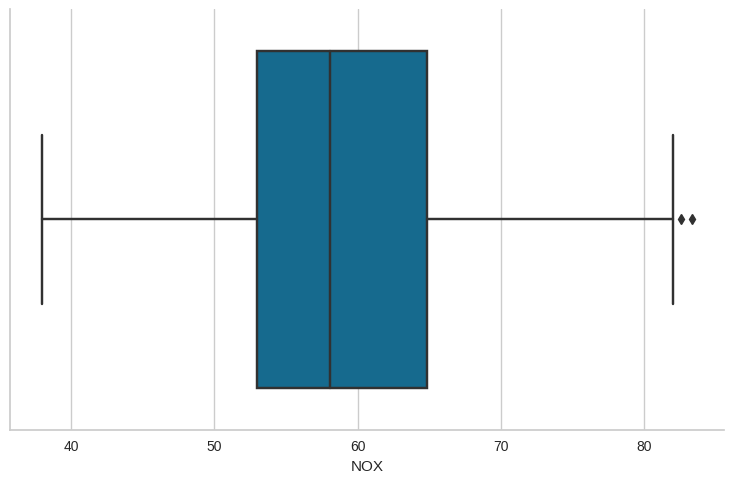

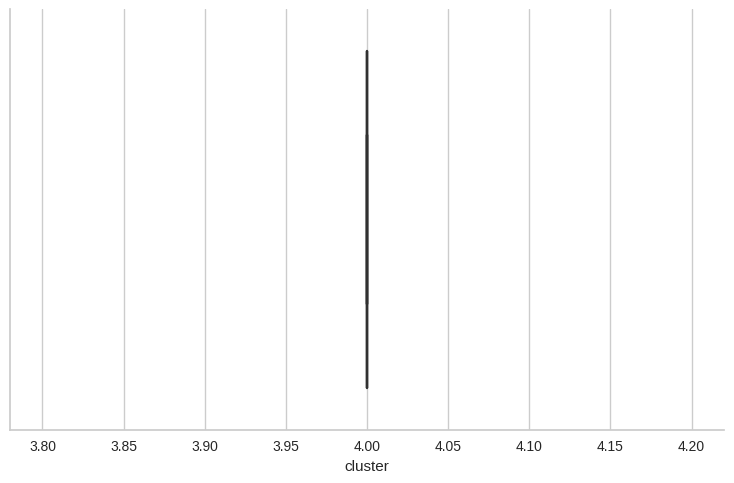

In [ ]:
for i in c4.columns:
  g = sns.FacetGrid(c4,height=5,aspect=1.5)
  g = g.map(sns.boxplot,i)

In [ ]:
from scipy import stats
z_scores = stats.zscore(c4)
abs_z_scores = np.abs(z_scores)
outlier_indices4 = (abs_z_scores > 3).any(axis=1)

In [ ]:
c4_cleaned = c4[~outlier_indices4]
c4_cleaned

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,cluster
1727,20.5970,1011.6,53.966,3.8820,19.747,1057.8,550.05,111.26,10.509,2.1192,69.203,4
1728,19.6820,1011.7,60.622,3.8408,19.746,1057.7,550.31,111.78,10.642,2.3353,69.408,4
1737,12.7980,1013.3,83.221,3.7353,19.772,1057.5,550.00,113.64,10.522,3.1741,76.343,4
1746,20.0980,1014.1,60.073,4.1294,21.348,1067.5,550.09,117.79,10.962,2.5211,72.597,4
1747,20.7940,1013.6,57.461,3.8575,19.743,1057.8,549.76,110.73,10.480,2.5008,70.948,4
...,...,...,...,...,...,...,...,...,...,...,...,...
36257,4.6241,1026.0,75.904,3.0656,21.616,1065.7,549.84,123.96,11.257,3.9015,70.648,4
36442,9.8799,1025.4,67.910,3.0354,21.330,1061.2,548.44,121.19,11.109,4.9341,62.804,4
36645,11.6840,1028.8,65.379,3.1284,21.280,1062.4,549.92,120.10,11.124,3.8244,63.816,4
36646,12.0780,1028.7,63.810,3.1421,21.537,1063.8,549.99,121.25,11.211,3.5333,63.861,4


In [ ]:
print(len(c4)-len(c4_cleaned))

346


Eliminated 417 outliers from cluster 4

In [ ]:
X = pd.concat([c0_cleaned,c1_cleaned,c2_cleaned,c3_cleaned,c4_cleaned],axis=0,ignore_index=True)

# Data Visualization

Text(0.5, 1.0, 'Heatmap')

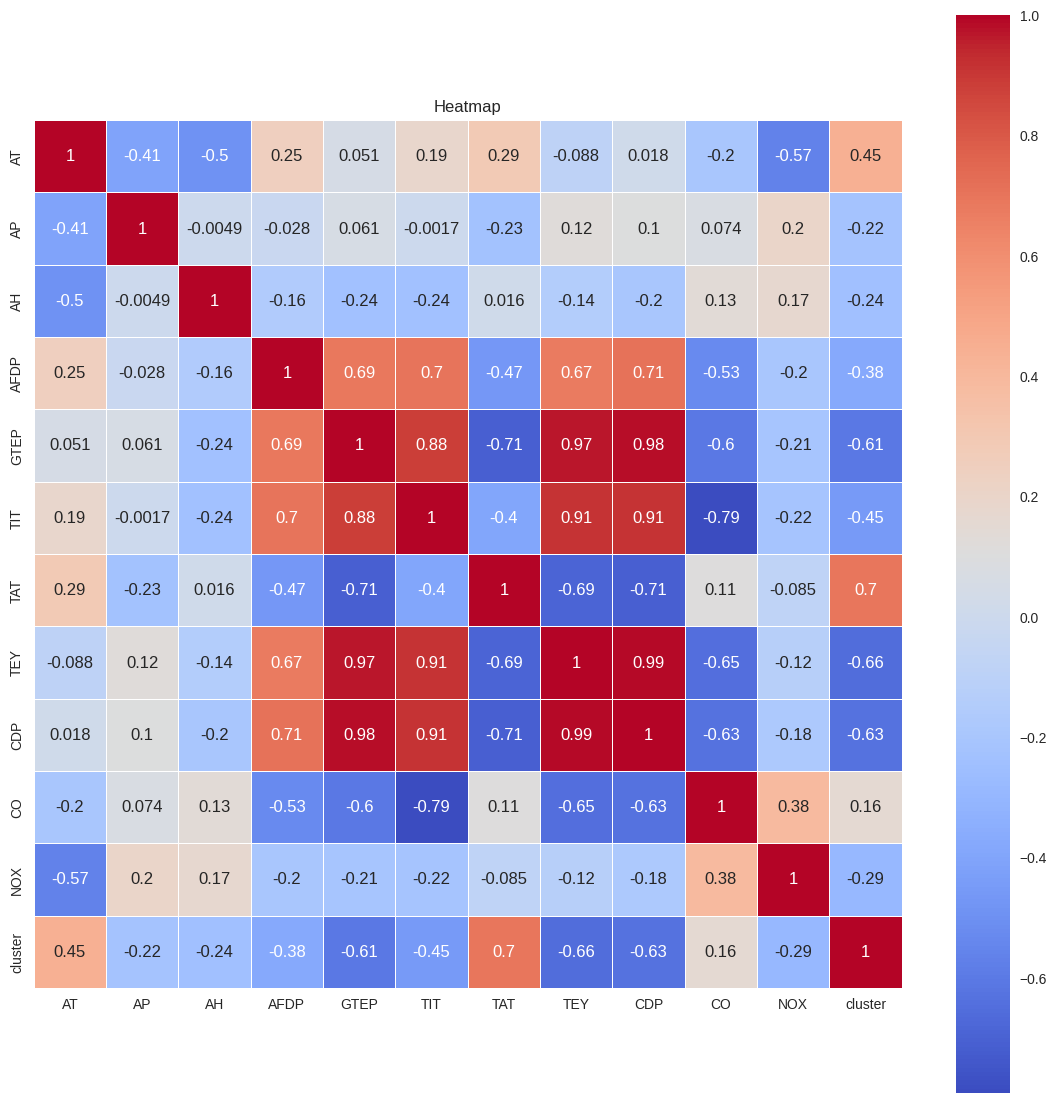

In [ ]:
fig, ax=plt.subplots(figsize=(14,14))
sns.heatmap(X.corr(),cmap="coolwarm",square=True,annot=True,linewidths=0.5)
plt.title("Heatmap")

**Observations:**

* Strong correlation between AFDP,GTEP,TITTEY&CDP
* NOX shows least correlation

In [ ]:
# sns.pairplot(X)

**Visualizing the Specific Distributions from Pairplot findings**

<Axes: xlabel='TEY', ylabel='CDP'>

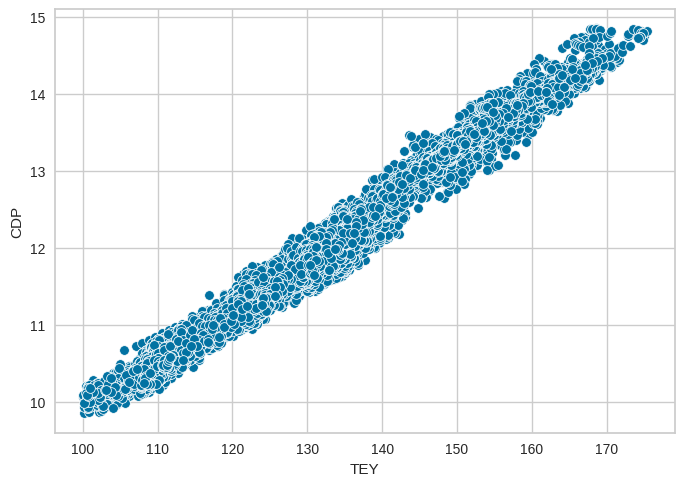

In [ ]:
sns.scatterplot(X,x ='TEY',y ='CDP')

In [ ]:
X.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX', 'cluster'],
      dtype='object')

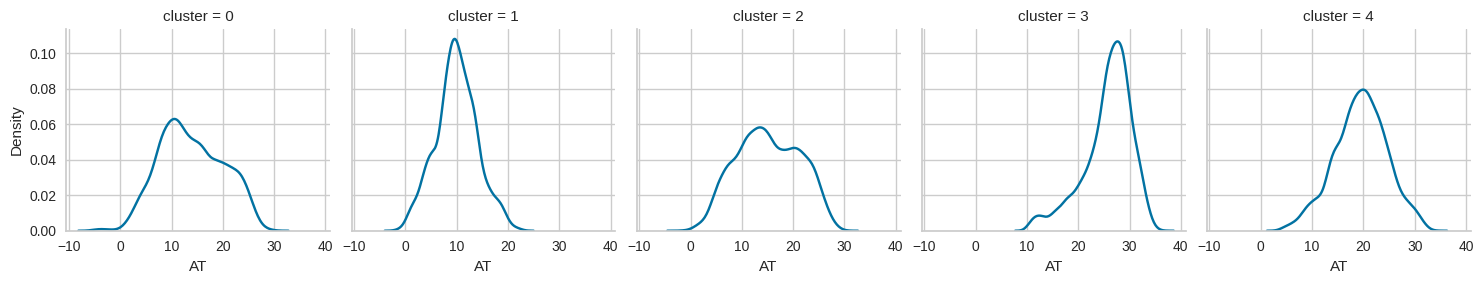

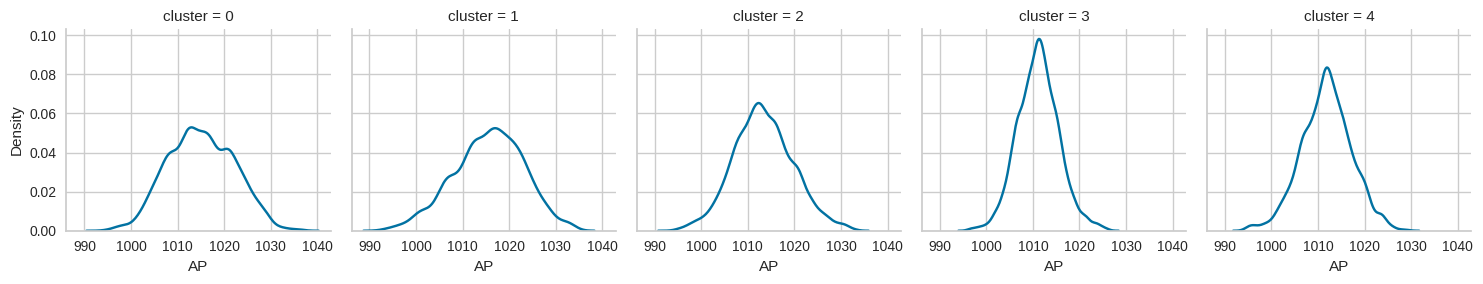

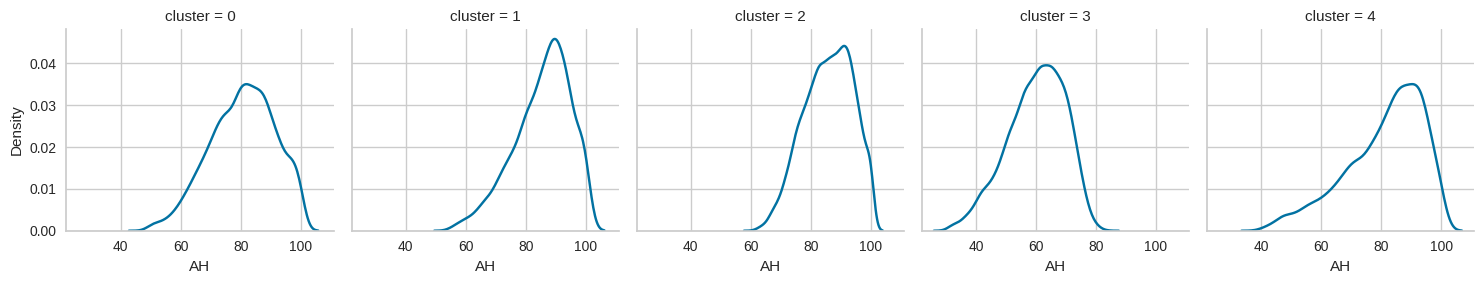

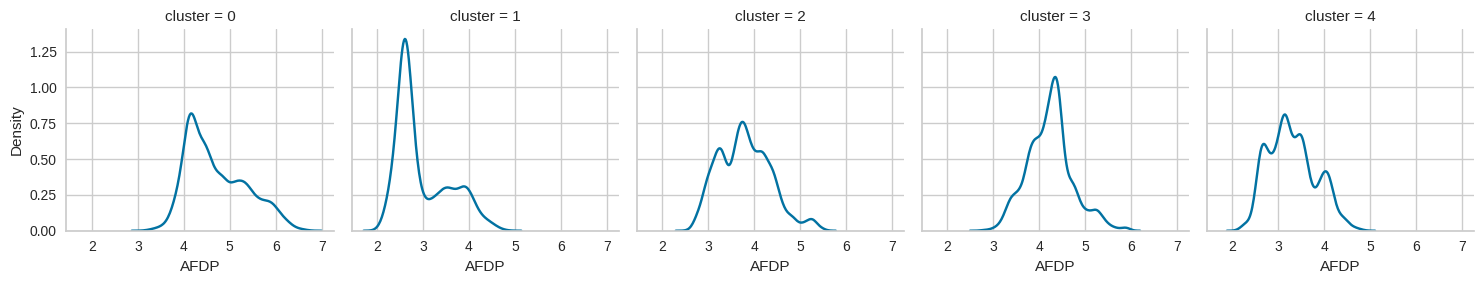

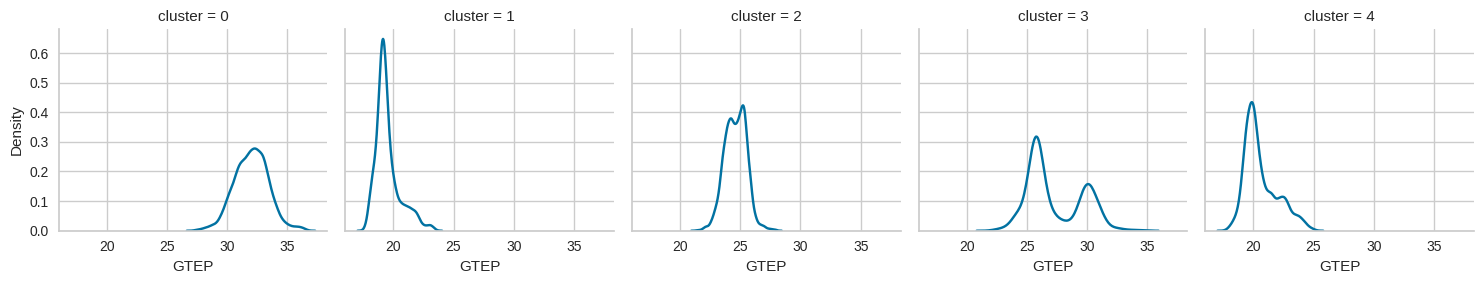

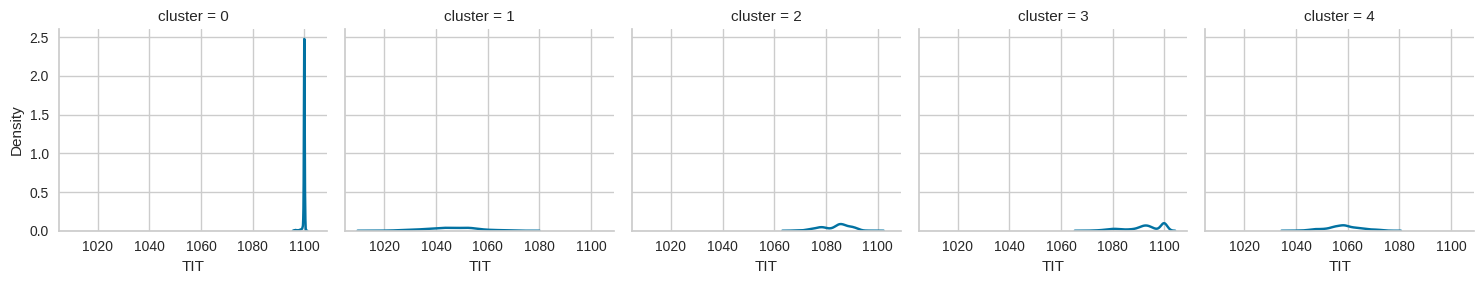

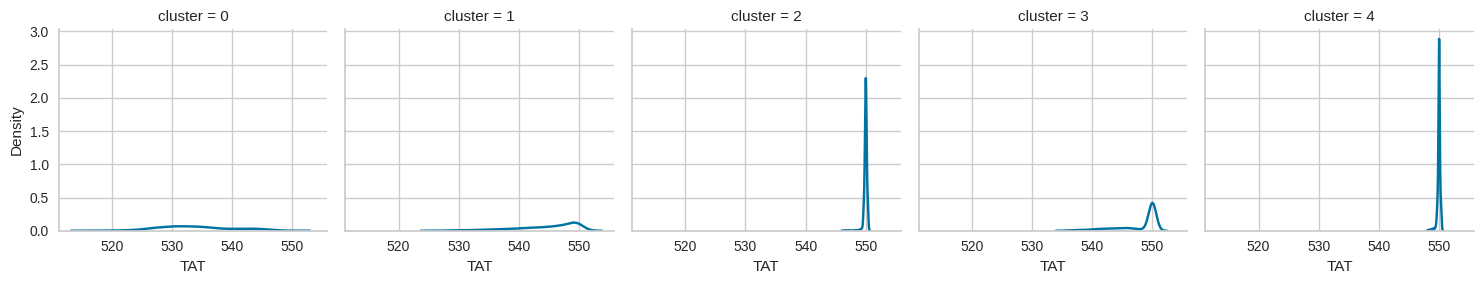

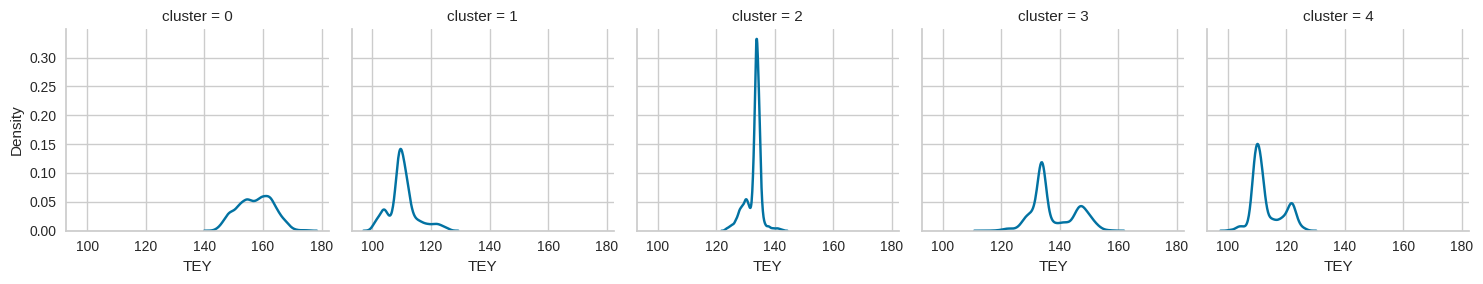

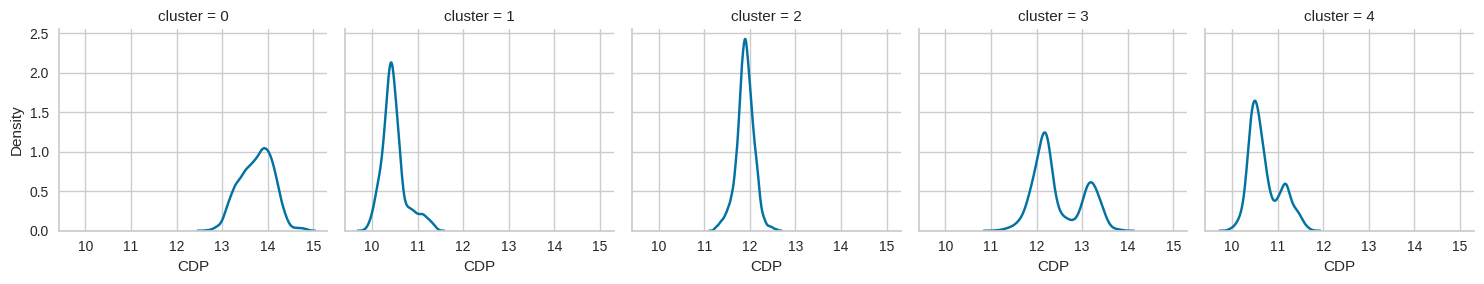

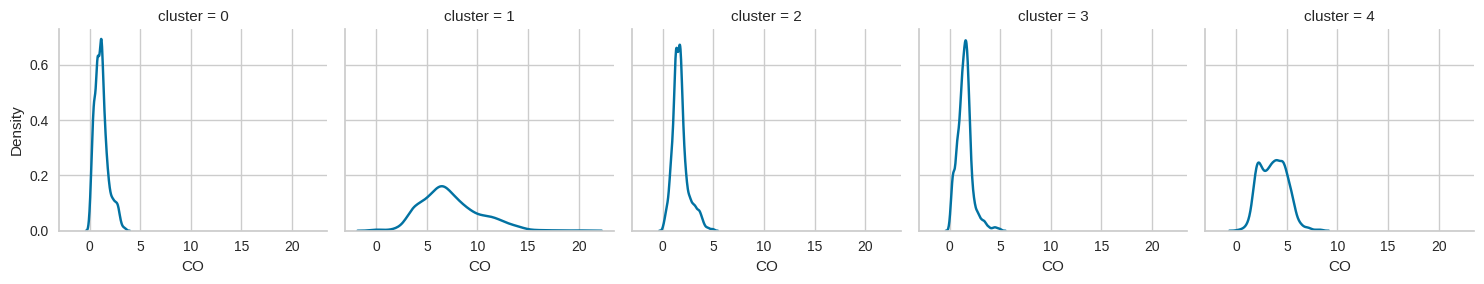

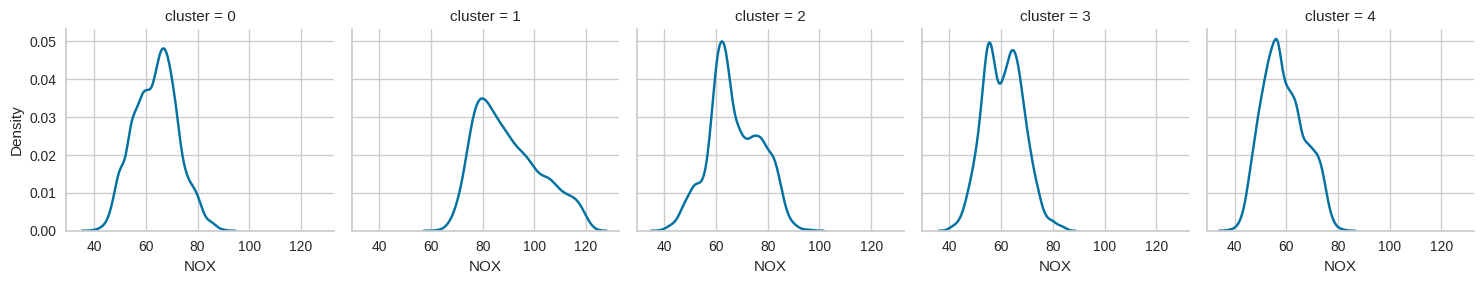

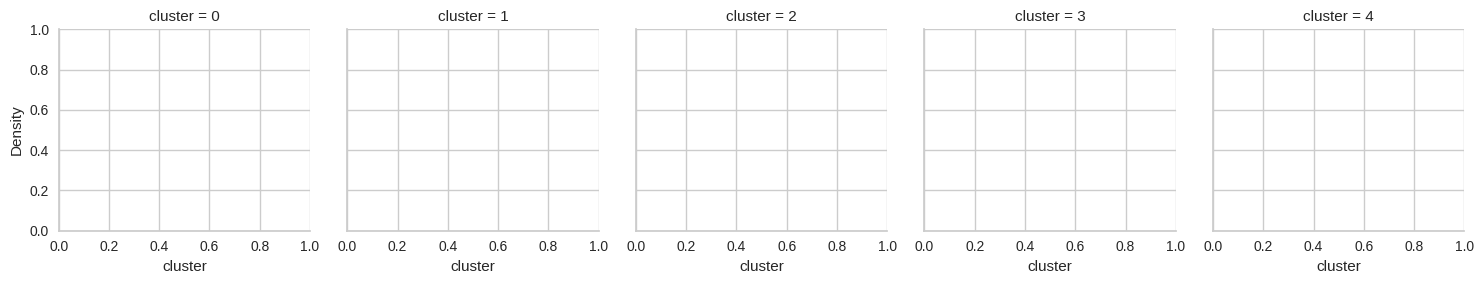

In [ ]:
for i in X.columns:
  g = sns.FacetGrid(X,col='cluster')
  g = g.map(sns.kdeplot, i)


In [ ]:
# from yellowbrick.cluster import KElbowVisualizer
# from sklearn.cluster import KMeans,AgglomerativeClustering
# from sklearn import metrics
# from sklearn.metrics import silhouette_score

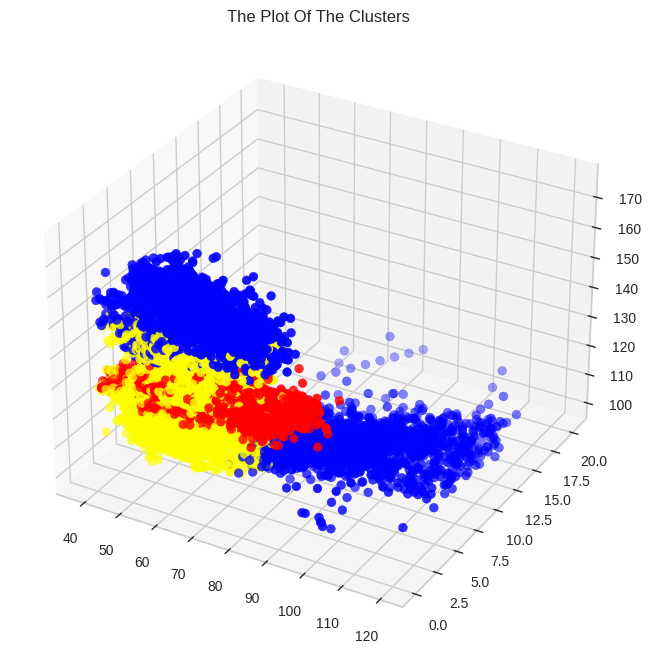

In [ ]:
x = X["NOX"]
y = X["CO"]
z = X["TEY"]
cmap = colors.ListedColormap(['blue','red','yellow'])
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=X["cluster"], marker='o',cmap = cmap)
ax.set_title("The Plot Of The Clusters")
plt.show()


In [ ]:
x=X.iloc[:,:-1].values
x

array([[   9.8712, 1017.2   ,   84.249 , ...,   13.929 ,    1.0428,
          70.558 ],
       [  10.722 , 1016.5   ,   80.263 , ...,   14.049 ,    1.3484,
          71.115 ],
       [  11.017 , 1016.3   ,   78.128 , ...,   14.018 ,    1.0686,
          70.107 ],
       ...,
       [  11.684 , 1028.8   ,   65.379 , ...,   11.124 ,    3.8244,
          63.816 ],
       [  12.078 , 1028.7   ,   63.81  , ...,   11.211 ,    3.5333,
          63.861 ],
       [  12.124 , 1028.8   ,   64.659 , ...,   11.245 ,    6.1245,
          66.281 ]])

In [ ]:
y=X.iloc[:,-1].values
y

array([0, 0, 0, ..., 4, 4, 4], dtype=int32)

# Hyperparameter Tuning

In [ ]:
# dt_classifier = DecisionTreeClassifier()
# dt_param_grid = {'max_depth': [None, 5, 10],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}
# dt_grid_search = GridSearchCV(dt_classifier, param_grid=dt_param_grid, cv=5)
# dt_grid_search.fit(x, y)
# print("Decision Tree - Best hyperparameters:", dt_grid_search.best_params_)

In [ ]:
# adaboost_classifier = AdaBoostClassifier()
# adaboost_param_grid = {'n_estimators': [10,20,30,40]}
# adaboost_grid_search = GridSearchCV(adaboost_classifier, param_grid=adaboost_param_grid, cv=5)
# adaboost_grid_search.fit(x, y)
# print("AdaBoost - Best hyperparameters:", adaboost_grid_search.best_params_)

In [ ]:
# xgb_classifier = XGBClassifier()
# xgb_param_grid = {'n_estimators': [10,20,30,40,50,100]}
# xgb_grid_search = GridSearchCV(xgb_classifier, param_grid=xgb_param_grid, cv=5)
# xgb_grid_search.fit(x, y)
# print("XGBoost - Best hyperparameters:", xgb_grid_search.best_params_)

In [ ]:
# rf_classifier = RandomForestClassifier()
# param_grid = {'n_estimators': [10,20,30],'max_depth': [None,5,10,20]}
# grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1)
# grid_search.fit(x, y)
# print("Best hyperparameters:", grid_search.best_params_)
# print("Best cross-validation score:", grid_search.best_score_)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train.shape,x_test.shape

((24186, 11), (10366, 11))

In [ ]:
y_train.shape,y_test.shape

((24186,), (10366,))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
base = GaussianNB()
svm = SVC()
dec = DecisionTreeClassifier(criterion ="entropy",max_depth= 10,min_samples_leaf= 4,min_samples_split= 2)
rfc = RandomForestClassifier(max_depth= 20,n_estimators= 30,random_state=42,)
xgb = XGBClassifier(n_estimators = 100)
adb = AdaBoostClassifier(n_estimators=30, random_state=42)
lst_model = [base,svm,dec,rfc,xgb,adb]

GaussianNB()
---------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1836
           1       0.95      0.91      0.93       697
           2       0.87      0.97      0.92      3531
           3       0.93      0.69      0.79      2332
           4       0.94      0.97      0.96      1970

    accuracy                           0.90     10366
   macro avg       0.92      0.90      0.91     10366
weighted avg       0.91      0.90      0.90     10366

Accuracy score of GaussianNB()   0.9045919351726799
SVC()
---------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1836
           1       0.99      0.99      0.99       697
           2       0.99      1.00      0.99      3531
           3       0.99      0.99      0.99      2332
           4     

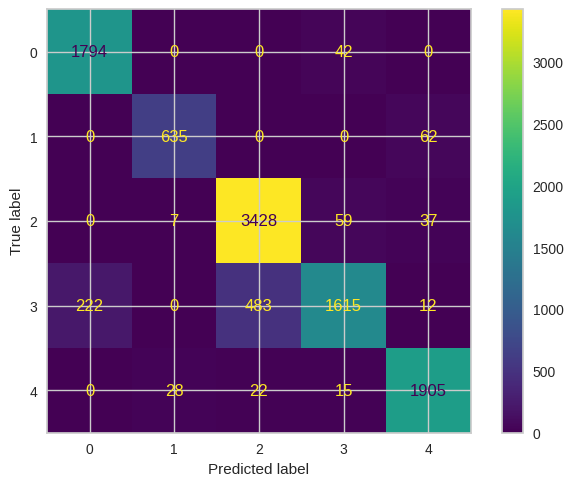

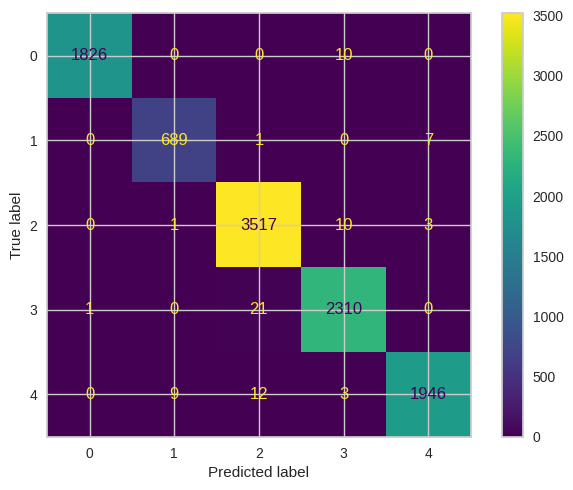

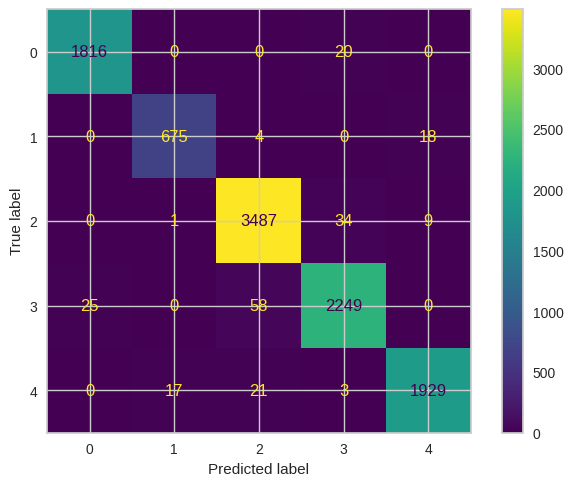

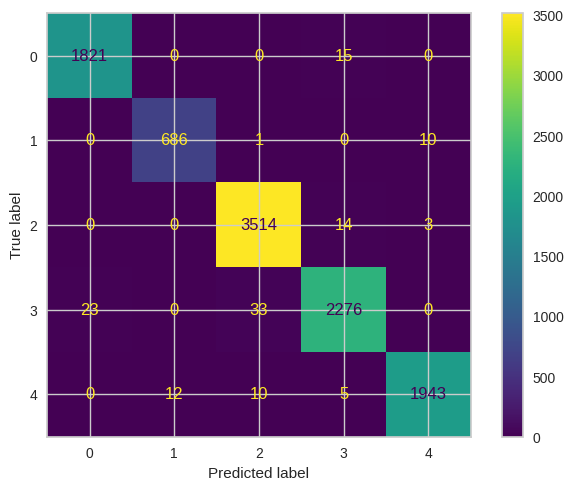

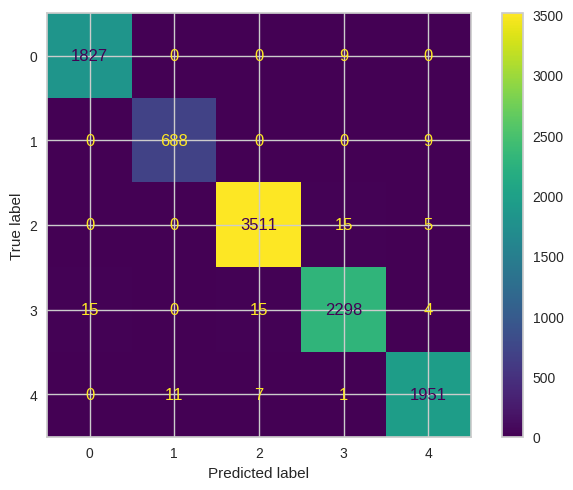

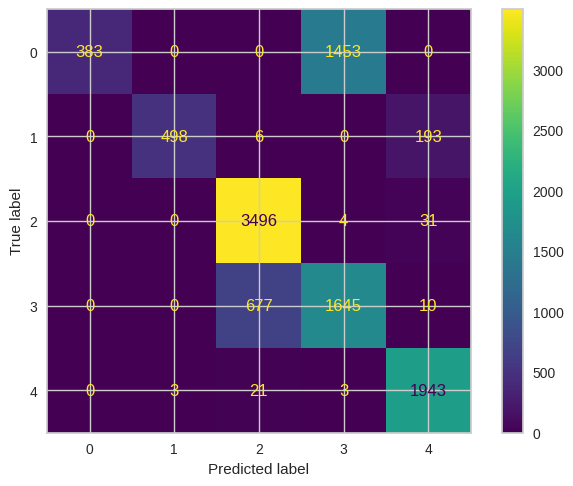

In [ ]:
for i in lst_model:
    print(i)
    print("-"*75)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    print(classification_report(y_test,y_pred))
    print("Accuracy score of",i," ",accuracy_score(y_test,y_pred))
    labels=[0,1,2,3,4]
    result=confusion_matrix(y_test,y_pred)
    cmd=ConfusionMatrixDisplay(result,display_labels=labels)
    cmd.plot()

In [ ]:
print("Naive-Bayes",base.predict([[12.7980,1013.3,83.221,3.7353,19.772,1057.5,550.00,113.64,10.522,3.1741,76.343]]))
print("Support Vector Machines",svm.predict([[12.7980,1013.3,83.221,3.7353,19.772,1057.5,550.00,113.64,10.522,3.1741,76.343]]))
print("Decision Tree Classifier",dec.predict([[12.7980,1013.3,83.221,3.7353,19.772,1057.5,550.00,113.64,10.522,3.1741,76.343]]))
print("Random Forest Classifier",rfc.predict([[12.7980,1013.3,83.221,3.7353,19.772,1057.5,550.00,113.64,10.522,3.1741,76.343]]))
print("Bagging",xgb.predict([[12.7980,1013.3,83.221,3.7353,19.772,1057.5,550.00,113.64,10.522,3.1741,76.343]]))
print("Boosting",adb.predict([[12.7980,1013.3,83.221,3.7353,19.772,1057.5,550.00,113.64,10.522,3.1741,76.343]]))

Naive-Bayes [1]
Support Vector Machines [1]
Decision Tree Classifier [0]
Random Forest Classifier [0]
Bagging [0]
Boosting [0]
